<a href="https://colab.research.google.com/github/moniquebritto21/Firend-zone-/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

### Reading and Cleaning oil_gas_dataset

In [309]:
oil_df=pd.read_csv("oil_gas_dataset.csv")

In [310]:
oil_df.head()

Symbol        Date   Open   High    Low  Close  Volume Currency
0  Brent Oil  2000-01-04  23.90  24.70  23.89  24.39   32509      USD
1  Brent Oil  2000-01-05  24.25  24.37  23.70  23.73   30310      USD
2  Brent Oil  2000-01-06  23.55  24.22  23.35  23.62   44662      USD
3  Brent Oil  2000-01-07  23.57  23.98  23.05  23.09   34826      USD
4  Brent Oil  2000-01-10  23.04  23.78  23.04  23.73   26388      USD

In [311]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23024 entries, 0 to 23023
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Symbol    23024 non-null  object 
 1   Date      23024 non-null  object 
 2   Open      23024 non-null  float64
 3   High      23024 non-null  float64
 4   Low       23024 non-null  float64
 5   Close     23024 non-null  float64
 6   Volume    23024 non-null  int64  
 7   Currency  23024 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


Preprocessing decisions
- convert date to DateTime
- drop high, low and volume since our analysis does not require such details
- drop currency column since all the values are identical
- split into brent oil, crude oil and natural gas datasets

In [312]:
#convert date column to datetime
oil_df['Date'] = pd.to_datetime(oil_df['Date'], format='%Y-%m-%d')


In [313]:
#drop non-essential columns
oil_df=oil_df.drop(columns=['High','Low','Volume','Currency'])

In [314]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23024 entries, 0 to 23023
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Symbol  23024 non-null  object        
 1   Date    23024 non-null  datetime64[ns]
 2   Open    23024 non-null  float64       
 3   Close   23024 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 719.6+ KB


In [315]:
oil_df['Symbol'].value_counts()

Symbol
Heating Oil      5770
Brent Oil        5768
Crude Oil WTI    5744
Natural Gas      5742
Name: count, dtype: int64

In [316]:
#split into separate dfs for oil and gas
brent_oil_df=oil_df[oil_df['Symbol']=='Brent Oil']
crude_oil_df=oil_df[oil_df['Symbol']=='Crude Oil WTI']
natural_gas_df=oil_df[oil_df['Symbol']=='Natural Gas']
heating_oil_df=oil_df[oil_df['Symbol']=='Heating Oil']

In [317]:
brent_oil_df

Symbol       Date    Open   Close
0     Brent Oil 2000-01-04   23.90   24.39
1     Brent Oil 2000-01-05   24.25   23.73
2     Brent Oil 2000-01-06   23.55   23.62
3     Brent Oil 2000-01-07   23.57   23.09
4     Brent Oil 2000-01-10   23.04   23.73
...         ...        ...     ...     ...
5763  Brent Oil 2022-06-13  121.94  122.27
5764  Brent Oil 2022-06-14  121.88  121.17
5765  Brent Oil 2022-06-15  120.79  118.51
5766  Brent Oil 2022-06-16  119.65  119.81
5767  Brent Oil 2022-06-17  119.13  113.12

[5768 rows x 4 columns]

In [318]:
crude_oil_df

Symbol       Date    Open   Close
5768   Crude Oil WTI 2000-01-04   25.20   25.55
5769   Crude Oil WTI 2000-01-05   25.50   24.91
5770   Crude Oil WTI 2000-01-06   24.80   24.78
5771   Crude Oil WTI 2000-01-07   24.65   24.22
5772   Crude Oil WTI 2000-01-10   24.22   24.67
...              ...        ...     ...     ...
11507  Crude Oil WTI 2022-06-13  120.19  120.93
11508  Crude Oil WTI 2022-06-14  121.09  118.93
11509  Crude Oil WTI 2022-06-15  119.07  115.31
11510  Crude Oil WTI 2022-06-16  115.98  117.59
11511  Crude Oil WTI 2022-06-17  117.08  109.56

[5744 rows x 4 columns]

In [319]:
natural_gas_df

Symbol       Date   Open  Close
11512  Natural Gas 2000-01-04  2.130  2.176
11513  Natural Gas 2000-01-05  2.180  2.168
11514  Natural Gas 2000-01-06  2.165  2.196
11515  Natural Gas 2000-01-07  2.195  2.173
11516  Natural Gas 2000-01-10  2.180  2.216
...            ...        ...    ...    ...
17249  Natural Gas 2022-06-13  8.920  8.609
17250  Natural Gas 2022-06-14  8.686  7.189
17251  Natural Gas 2022-06-15  7.269  7.420
17252  Natural Gas 2022-06-16  7.540  7.464
17253  Natural Gas 2022-06-17  7.454  6.944

[5742 rows x 4 columns]

In [320]:
heating_oil_df

Symbol       Date    Open   Close
17254  Heating Oil 2000-01-04  0.6720  0.6778
17255  Heating Oil 2000-01-05  0.6790  0.6655
17256  Heating Oil 2000-01-06  0.6645  0.6628
17257  Heating Oil 2000-01-07  0.6600  0.6475
17258  Heating Oil 2000-01-10  0.6445  0.6472
...            ...        ...     ...     ...
23019  Heating Oil 2022-06-13  4.3612  4.2834
23020  Heating Oil 2022-06-14  4.2749  4.3940
23021  Heating Oil 2022-06-15  4.3816  4.5470
23022  Heating Oil 2022-06-16  4.5320  4.5713
23023  Heating Oil 2022-06-17  4.5719  4.3398

[5770 rows x 4 columns]

### Reading and Cleaning sectoral_gdp dataset

In [321]:
gdp_df=pd.read_csv("sectoral_gdp.csv")

In [322]:
gdp_df.head()

Quarter/Year Unnamed: 1     2012-1     2012-2  \
0                                NaN        NaN        NaN        NaN   
1                           Industry       ISIC        NaN        NaN   
2  Agriculture, forestry and fishing          A     289.5      282.1    
3               Mining and quarrying          B   9,212.6    8,893.6    
4                      Manufacturing          C   7,888.0    7,847.7    

      2012-3     2012-4     2013-1     2013-2     2013-3     2013-4  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN        NaN        NaN  ...   
2     284.0      287.5      279.9      270.3      269.8      271.5   ...   
3   8,773.2    8,486.3    9,024.4    9,047.8    9,031.8    8,871.1   ...   
4   7,768.4    7,030.1    7,692.1    7,710.2    7,516.2    7,537.2   ...   

      2021-1     2021-2     2021-3     2021-4     2022-1     2022-2  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2     256.4      238.6      219.5      218.7      204.5      208.5    
3   5,901.5    5,708.6    5,589.9    5,669.7    5,573.5    5,683.4    
4   5,980.1    6,066.7    6,100.6    6,169.4    6,308.3    6,324.1    

      2022-3     2022-4     2023-1     2023-2  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2     196.3      204.7      196.2      205.2   
3   6,079.8    5,670.9    5,630.0    5,572.6   
4   6,572.4    6,419.2    6,189.8    6,276.9   

[5 rows x 48 columns]

In [323]:
gdp_df=gdp_df.transpose()

In [324]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, Quarter/Year to 2023-2
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       0 non-null      object
 1   1       2 non-null      object
 2   2       48 non-null     object
 3   3       48 non-null     object
 4   4       48 non-null     object
 5   5       1 non-null      object
 6   6       48 non-null     object
 7   7       48 non-null     object
 8   8       48 non-null     object
 9   9       48 non-null     object
 10  10      48 non-null     object
 11  11      48 non-null     object
 12  12      48 non-null     object
 13  13      48 non-null     object
 14  14      48 non-null     object
 15  15      48 non-null     object
 16  16      48 non-null     object
 17  17      48 non-null     object
 18  18      48 non-null     object
 19  19      1 non-null      object
 20  20      48 non-null     object
 21  21      48 non-null     object
 22  22      48 non-nul

In [325]:
gdp_df.head()

0         1                                  2   \
Quarter/Year  NaN  Industry  Agriculture, forestry and fishing   
Unnamed: 1    NaN      ISIC                                  A   
2012-1        NaN       NaN                             289.5    
2012-2        NaN       NaN                             282.1    
2012-3        NaN       NaN                             284.0    

                                3              4          5   \
Quarter/Year  Mining and quarrying  Manufacturing  Of which:   
Unnamed: 1                       B              C        NaN   
2012-1                    9,212.6        7,888.0         NaN   
2012-2                    8,893.6        7,847.7         NaN   
2012-3                    8,773.2        7,768.4         NaN   

                                                6   \
Quarter/Year  Food, beverages and tobacco products   
Unnamed: 1                                      CA   
2012-1                                    1,199.1    
2012-2                                    1,200.2    
2012-3                                    1,227.5    

                                                             7   \
Quarter/Year  Textiles, clothing, leather, wood, paper and p...   
Unnamed: 1                                                 CB-C   
2012-1                                                   231.6    
2012-2                                                   280.6    
2012-3                                                   263.9    

                                           8                            9   \
Quarter/Year  Petroleum and chemical products  Other manufactured products   
Unnamed: 1                               CD-E                         CF-M   
2012-1                               5,959.2                        498.1    
2012-2                               5,811.6                        555.3    
2012-3                               5,744.2                        532.8    

              ...        31                                  32  \
Quarter/Year  ...  Of which  Crude Oil Exploration & Extraction   
Unnamed: 1    ...       NaN                                  B1   
2012-1        ...       NaN                            3,027.1    
2012-2        ...       NaN                            3,182.4    
2012-3        ...       NaN                            3,188.1    

                                 33                                    34  \
Quarter/Year  Condensate Extraction  Natural Gas Exploration & Extraction   
Unnamed: 1                       B2                                    B3   
2012-1                     1,344.6                               4,074.5    
2012-2                     1,100.6                               3,924.4    
2012-3                       970.9                               4,083.1    

                    35                          36                    37  \
Quarter/Year  Asphalt   Petroleum support services  Refining (incl. LNG)   
Unnamed: 1          B4                          B5                    C1   
2012-1           55.2                       679.2               2,638.6    
2012-2           55.2                       630.4               2,607.8    
2012-3           55.2                       447.1               2,611.7    

                                         38  \
Quarter/Year  Manufacture of Petrochemicals   
Unnamed: 1                               C2   
2012-1                             3,091.3    
2012-2                             3,027.3    
2012-3                             2,932.7    

                                                  39  \
Quarter/Year  Petroleum and natural gas distribution   
Unnamed: 1                                        G1   
2012-1                                      1,290.3    
2012-2                                      1,297.9    
2012-3                                      1,283.5    

                                               40  
Quarter/Year  Source:  Central Statistica

Preprocessing decisions are based on the following observations
- The first row of this dataset contains industry labels.
- The second row is a code for each industry.
- There are many NaN columns (0,1,5,19,31,40).
- Multi-letter codes (row 2) contain a combination of industry products. Our research focuses on the contribution of individual sectors. Thus these rows are not needed.

In [326]:
gdp_clean=gdp_df.copy()

In [327]:
#extract dates column
dates=pd.DataFrame(gdp_clean[0])
dates.info()
print(dates.head())
print(dates.iloc[5])


<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, Quarter/Year to 2023-2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       0 non-null      object
dtypes: object(1)
memory usage: 1.8+ KB
                0
Quarter/Year  NaN
Unnamed: 1    NaN
2012-1        NaN
2012-2        NaN
2012-3        NaN
0    NaN
Name: 2012-4, dtype: object


In [328]:
#clean dates data
years=[]
quarters=[]
for i in range(2,len(dates)):
    date=dates.iloc[i].name

    #convert to string and remove trailing whitespace
    date=str(date).strip()

    #split into year and quarter
    year, quarter = date.split("-")
    years.append(int(year))
    quarters.append(int(quarter))

dates_df=pd.DataFrame({'Year':years, 'Quarter':quarters})
dates_df.head()


Year  Quarter
0  2012        1
1  2012        2
2  2012        3
3  2012        4
4  2013        1

In [329]:
# set column names to industry
gdp_clean.columns=gdp_clean.iloc[0]
gdp_clean=gdp_clean[1:]



In [330]:
#extract and clean total gdp column
total_gdp=gdp_clean['GDP at basic prices']
values=[]

for val in total_gdp[1:]:   #exclude nan in first row
    amount=float(val.replace(",",""))
    values.append(amount)

total_gdp_df=pd.DataFrame({'Total GDP':values})
total_gdp_df.head()

Total GDP
0    41793.4
1    42040.3
2    42450.8
3    41692.8
4    42009.3

In [331]:
#extract and clean industry columns
industries=[]
values=[]
for col in gdp_clean.columns:
    data=gdp_clean[col].iloc[0]
    data=str(data).strip()
    if len(data)==1:
        industries.append(col)

industries_df=pd.DataFrame(gdp_clean[industries][1:])


industries_df = industries_df.reset_index(drop=True)
industries_df


Quarter/Year Agriculture, forestry and fishing Mining and quarrying  \
0                                       289.5              9,212.6    
1                                       282.1              8,893.6    
2                                       284.0              8,773.2    
3                                       287.5              8,486.3    
4                                       279.9              9,024.4    
5                                       270.3              9,047.8    
6                                       269.8              9,031.8    
7                                       271.5              8,871.1    
8                                       256.5              8,787.9    
9                                       256.1              8,776.8    
10                                      273.4              9,175.1    
11                                      312.4              8,986.4    
12                                      347.2              8,947.5    
13                                      370.8              8,748.3    
14                                      378.6              8,528.9    
15                                      370.8              8,371.6    
16                                      353.1              8,082.7    
17                                      341.3              7,270.2    
18                                      330.8              7,039.0    
19                                      349.0              7,672.5    
20                                      356.5              7,560.7    
21                                      370.2              7,262.8    
22                                      367.4              7,597.7    
23                                      386.4              7,427.3    
24                                      368.0              7,546.3    
25                                      358.1              7,259.0    
26                                      322.7              6,968.4    
27                                      296.1              6,816.6    
28                                      233.2              6,953.3    
29                                      204.2              6,738.2    
30                                      194.0              6,960.5    
31                                      225.9              6,863.1    
32                                      256.1              6,559.4    
33                                      280.1              6,013.6    
34                                      285.1              5,926.4    
35                                      287.8              5,650.6    
36                                      256.4              5,901.5    
37                                      238.6              5,708.6    
38                                      219.5              5,589.9    
39                                      218.7              5,669.7    
40                                      204.5              5,573.5    
41                                      208.5              5,683.4    
42                                      196.3              6,079.8    
43                                      204.7              5,670.9    
44                                      196.2              5,630.0    
45                                      205.2              5,572.6    

Quarter/Year Manufacturing Electricity and gas Water supply and sewerage  \
0                 7,888.0             1,309.3                     512.3    
1                 7,847.7             1,299.3                     509.3    
2                 7,768.4             1,327.9                     513.2    
3                 7,030.1             1,229.4                     522.3    
4                 7,692.1             1,329.9                     485.1    
5                 7,710.2             1,308.6                     493.5    
6                 7,516.2             1,296.0                     511.6    
7                 7,537.2             1,350.7         

In [332]:
#remove commas and spaces from currency data
for row in range(0,len(industries_df)):
    for col in range(0,len(industries_df.columns)):
        value=industries_df.iloc[row,col].strip()
        cleaned=value.replace(",","")
        industries_df.iloc[row,col]=cleaned



In [333]:
industries_df.head()

Quarter/Year Agriculture, forestry and fishing Mining and quarrying  \
0                                        289.5               9212.6   
1                                        282.1               8893.6   
2                                        284.0               8773.2   
3                                        287.5               8486.3   
4                                        279.9               9024.4   

Quarter/Year Manufacturing Electricity and gas Water supply and sewerage  \
0                   7888.0              1309.3                     512.3   
1                   7847.7              1299.3                     509.3   
2                   7768.4              1327.9                     513.2   
3                   7030.1              1229.4                     522.3   
4                   7692.1              1329.9                     485.1   

Quarter/Year Construction Trade and repairs Transport and storage  \
0                  2155.9            9179.4                1314.3   
1                  2199.7            9855.2                1316.1   
2                  2216.4           10018.6                1501.2   
3                  2037.7           10746.8                1234.4   
4                  2246.7            9442.0                1455.2   

Quarter/Year Accommodation and food services Information and communication  \
0                                      563.6                         945.3   
1                                      523.3                         956.9   
2                                      546.6                         974.9   
3                                      506.4                         981.3   
4                                      555.3                         978.9   

Quarter/Year Financial and insurance activities Real estate activities  \
0                                        2333.3                  753.3   
1                                        2304.2                  754.7   
2                                        2329.7                  756.6   
3                                        2360.5                  757.4   
4                                        2339.3                  760.1   

Quarter/Year Professional, scientific and technical services  \
0                                                      604.0   
1                                                      544.2   
2                                                      602.5   
3                                                      619.1   
4                                                      446.9   

Quarter/Year Administrative and support services Public administration  \
0                                          779.6                2687.4   
1                                          801.2                2682.8   
2                                          856.3                2701.3   
3                                          921.5                2686.9   
4                                         1020.8                2658.4   

Quarter/Year Education Human health and social work  \
0                903.4                        147.4   
1                905.4                        147.1   
2                914.3                        147.9   
3                917.6                        147.7   
4                924.4                        148.0   

Quarter/Year Arts, entertainment and recreation Other service activities  \
0                                          94.4                     80.5   
1                                          94.1                     83.2   
2                                          94.7                     82.9   
3                                          94.5                     85.4   
4                                          94.7                     87.0   

Quarter/Year Domestic services  
0                         39.8  
1                         40.0  
2                         40.1  
3                         40.3  
4   

In [334]:
#convert df to float
industries_df=industries_df.astype(float)
industries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Agriculture, forestry and fishing                46 non-null     float64
 1   Mining and quarrying                             46 non-null     float64
 2   Manufacturing                                    46 non-null     float64
 3   Electricity and gas                              46 non-null     float64
 4   Water supply and sewerage                        46 non-null     float64
 5   Construction                                     46 non-null     float64
 6   Trade and repairs                                46 non-null     float64
 7   Transport and storage                            46 non-null     float64
 8   Accommodation and food services                  46 non-null     float64
 9   Information and communication     

In [335]:
#combine date(year/quarter), industry values, totals
gdp_clean=pd.concat([dates_df,industries_df,total_gdp_df], axis=1)
gdp_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             46 non-null     int64  
 1   Quarter                                          46 non-null     int64  
 2   Agriculture, forestry and fishing                46 non-null     float64
 3   Mining and quarrying                             46 non-null     float64
 4   Manufacturing                                    46 non-null     float64
 5   Electricity and gas                              46 non-null     float64
 6   Water supply and sewerage                        46 non-null     float64
 7   Construction                                     46 non-null     float64
 8   Trade and repairs                                46 non-null     float64
 9   Transport and storage             

The cleaned datasets are as follows
- Oil and Gas: brent_oil_df, crude_oil_df, natural_gas_df
- Sectoral GDP: gdp_clean

# Visualization

In [336]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

### Bar Chart Showing Q1 and Q4 for 2012

In [337]:
filtered_df_2012 = gdp_clean[gdp_clean['Year'] == 2012]
filtered_df_2012 = filtered_df_2012.drop(columns = ['Total GDP', 'Year'])
filtered_df_2012_Q1 = filtered_df_2012[filtered_df_2012['Quarter'] == 1]
filtered_df_2012_Q4 = filtered_df_2012[filtered_df_2012['Quarter'] == 4]

In [338]:
columns_to_plot = ['Agriculture, forestry and fishing',
       'Mining and quarrying', 'Manufacturing', 'Electricity and gas',
       'Water supply and sewerage', 'Construction', 'Trade and repairs',
       'Transport and storage', 'Accommodation and food services',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical services',
       'Administrative and support services', 'Public administration',
       'Education', 'Human health and social work',
       'Arts, entertainment and recreation', 'Other service activities',
       'Domestic services']


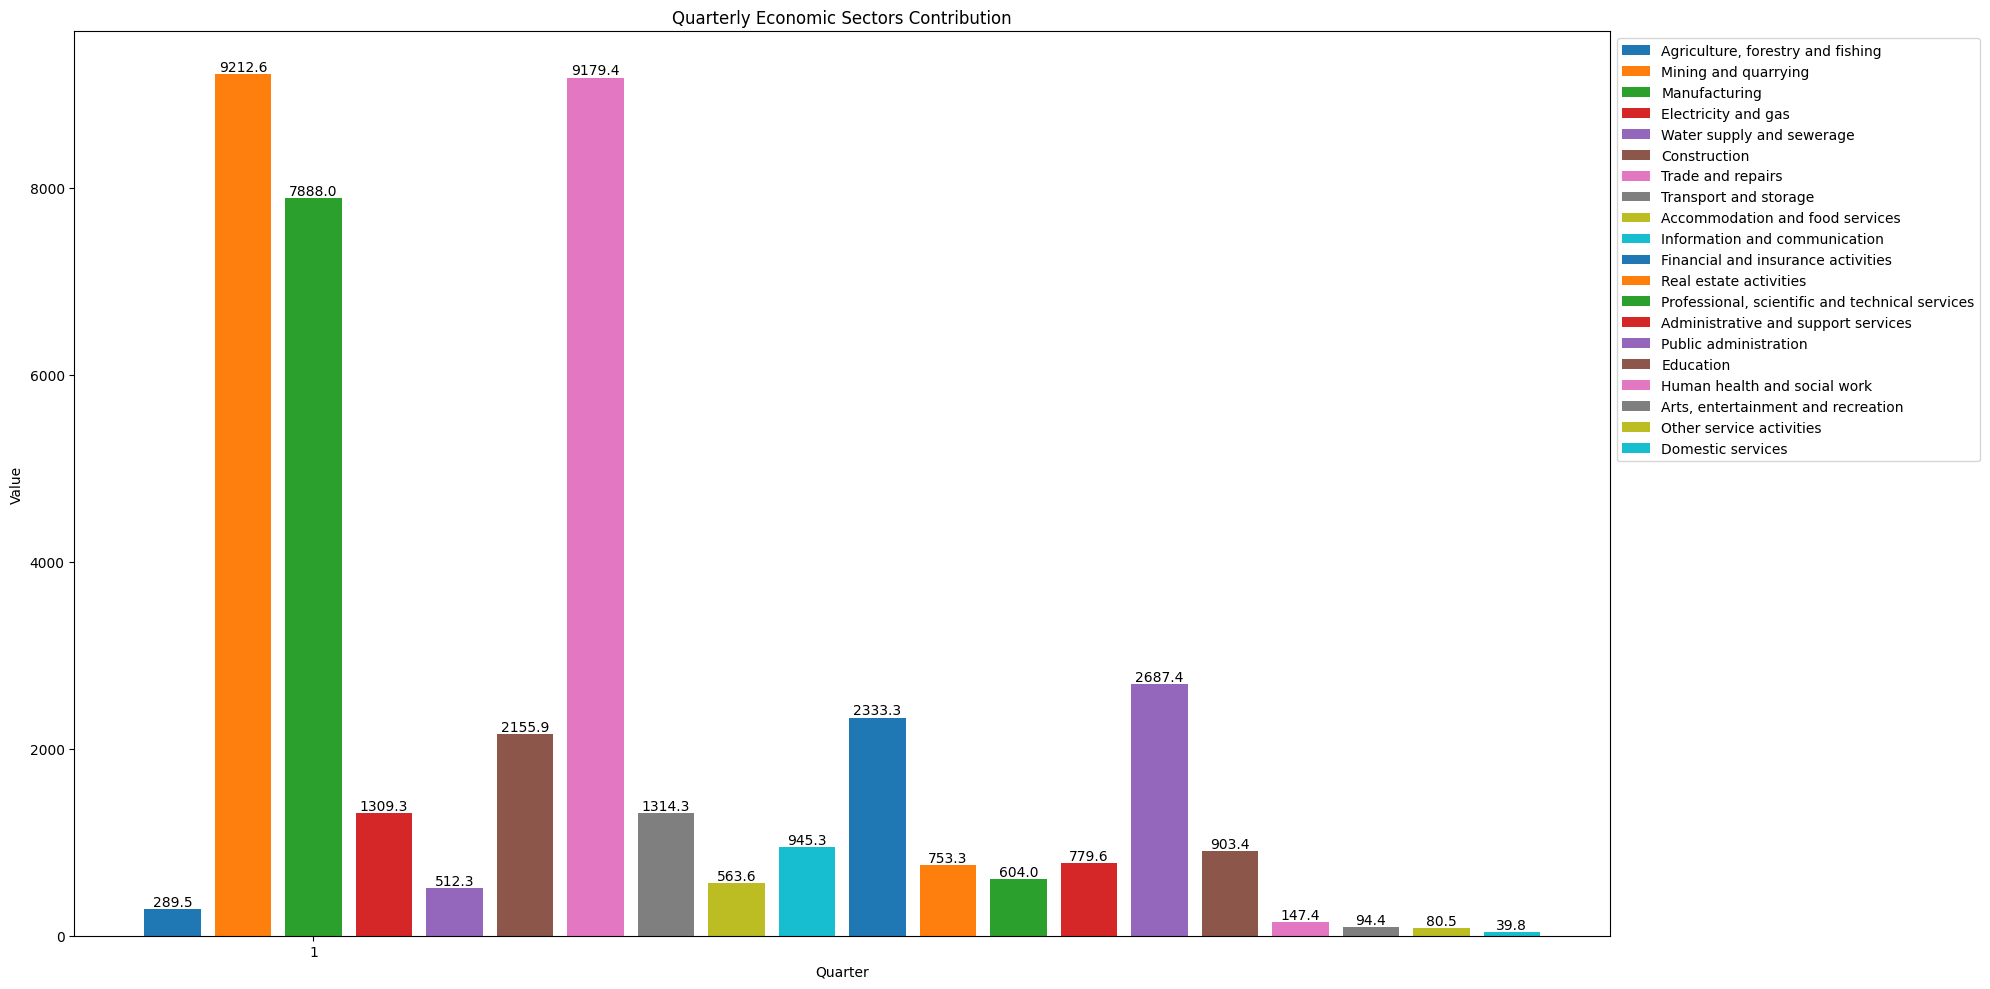

In [339]:
plt.figure(figsize=(20, 10))

# Plot bars
for column in columns_to_plot:
    plt.bar(filtered_df_2012_Q1['Quarter'] + (columns_to_plot.index(column) - 2) * 0.15, filtered_df_2012_Q1[column], width=0.12, label=column)

    # Add value labels on top of bars
    for i, value in enumerate(filtered_df_2012_Q1[column]):
        plt.text(filtered_df_2012_Q1['Quarter'][i] + (columns_to_plot.index(column) - 2) * 0.15, value + 1, f'{value}', ha='center', va='bottom')

plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Quarterly Economic Sectors Contribution')
plt.xticks(filtered_df_2012_Q1['Quarter'])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

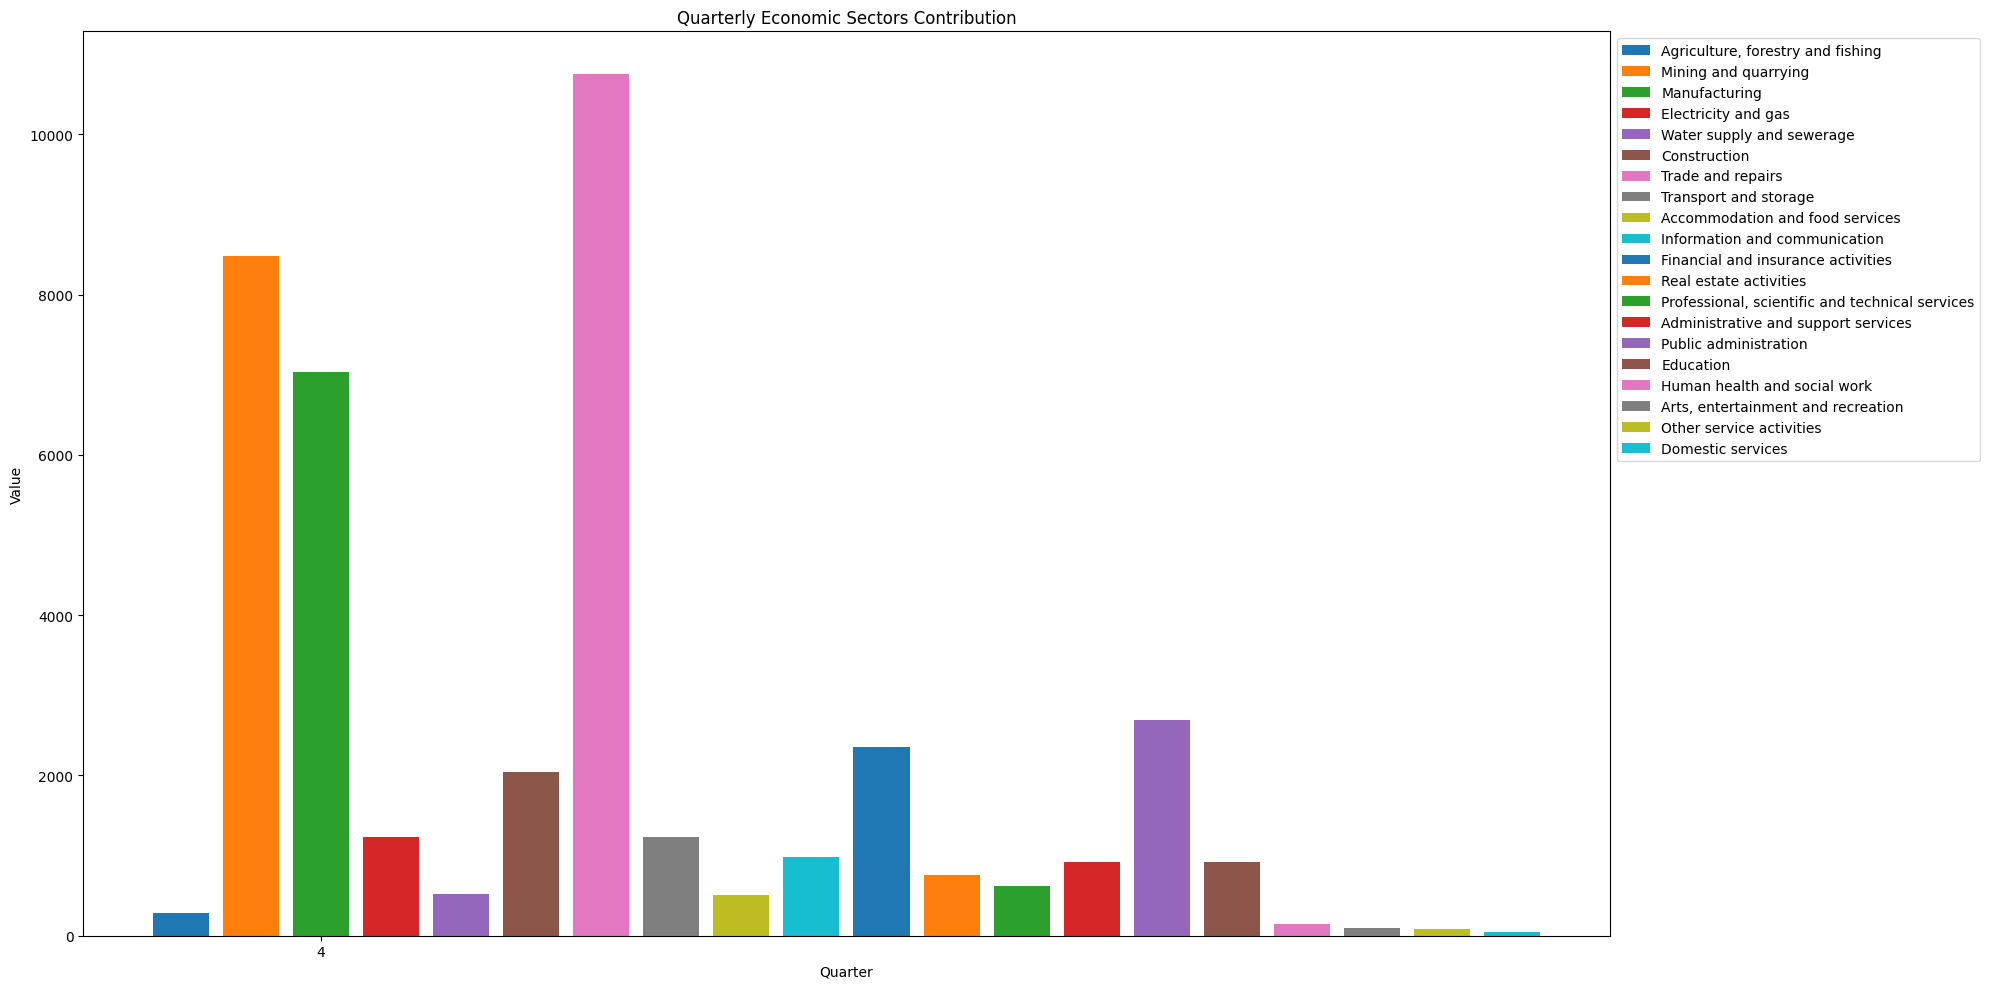

In [340]:
plt.figure(figsize=(20, 10))
# Plot bars
for column in columns_to_plot:
    plt.bar(filtered_df_2012_Q4['Quarter'] + (columns_to_plot.index(column) - 2) * 0.15, filtered_df_2012_Q4[column], width=0.12, label=column)

plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Quarterly Economic Sectors Contribution')
plt.xticks(filtered_df_2012_Q4['Quarter'])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

### Bar Chart Showing Q1 and Q4 for 2022

In [341]:
filtered_df_2022 = gdp_clean[gdp_clean['Year'] == 2022]
filtered_df_2022 = filtered_df_2022.drop(columns = ['Total GDP', 'Year'])
filtered_df_2022_Q1 = filtered_df_2022[filtered_df_2022['Quarter'] == 1]
filtered_df_2022_Q4 = filtered_df_2022[filtered_df_2022['Quarter'] == 4]

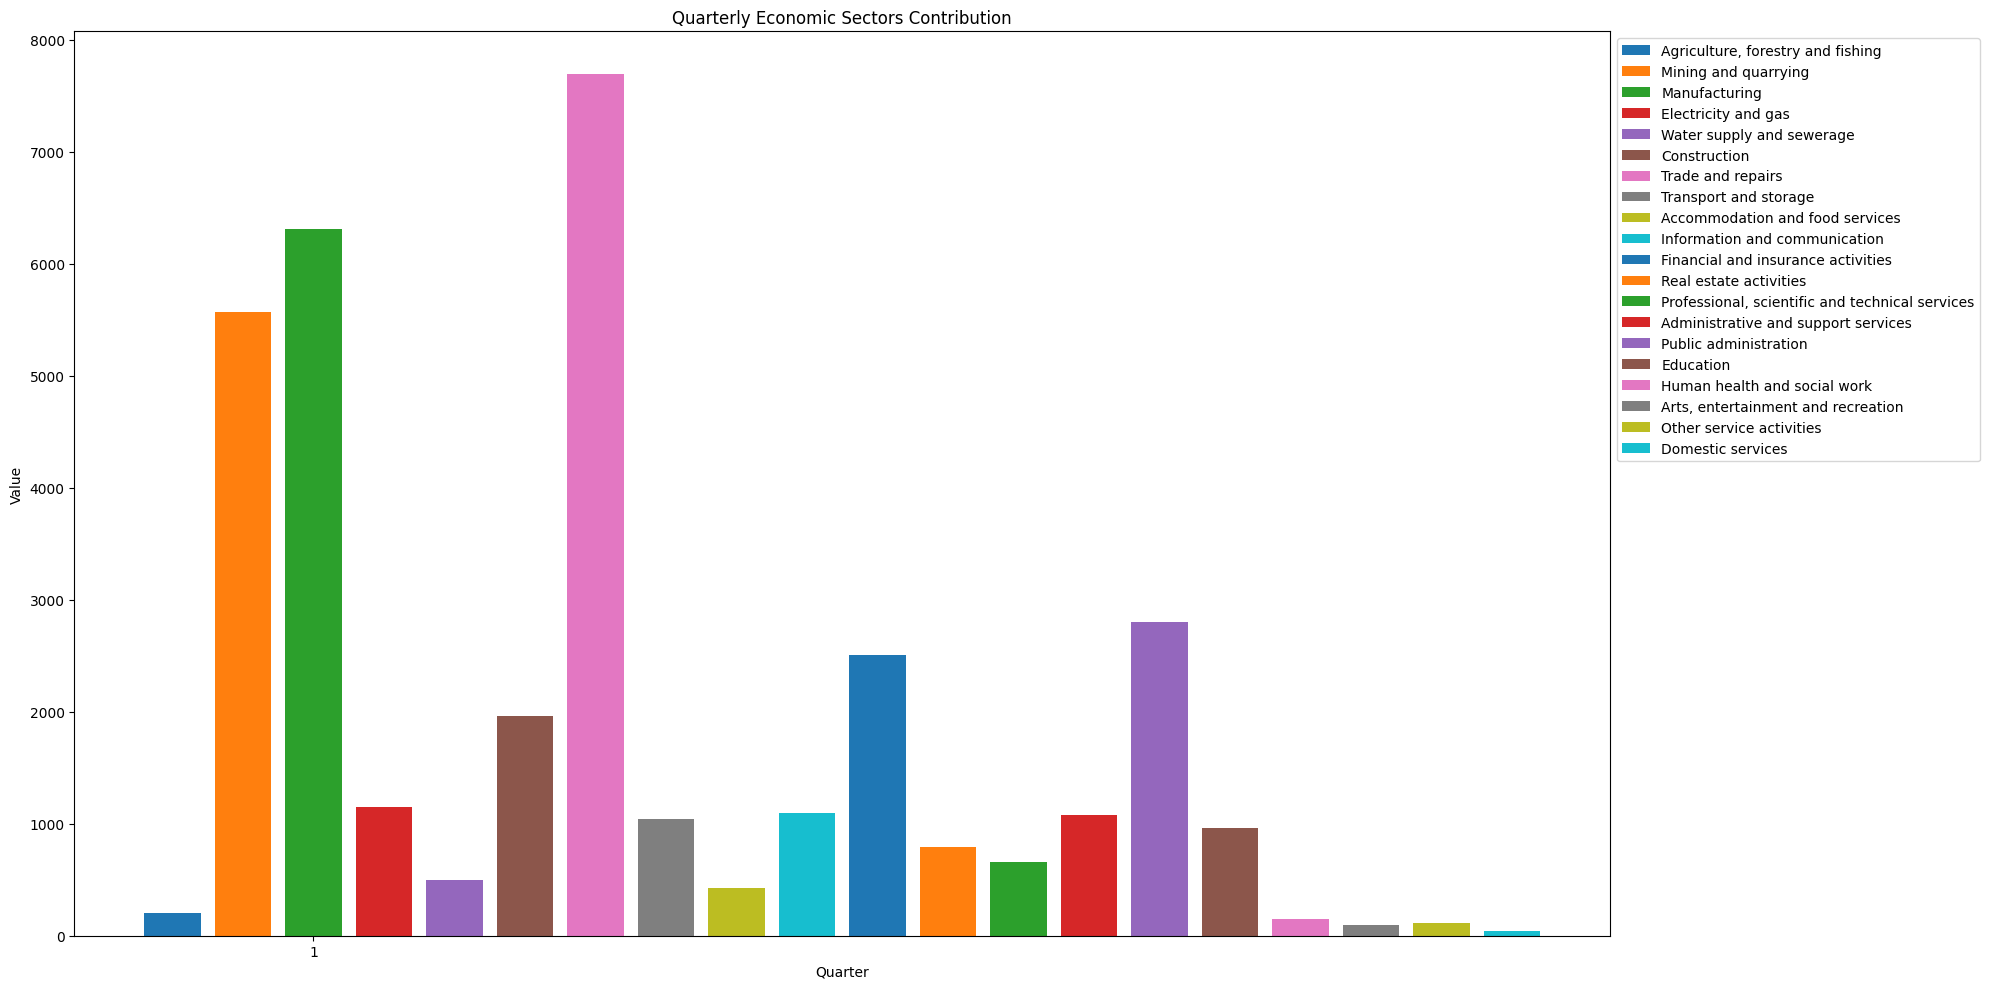

In [342]:
plt.figure(figsize=(20, 10))

# Plot bars
for column in columns_to_plot:
    plt.bar(filtered_df_2022_Q1['Quarter'] + (columns_to_plot.index(column) - 2) * 0.15, filtered_df_2022_Q1[column], width=0.12, label=column)


plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Quarterly Economic Sectors Contribution')
plt.xticks(filtered_df_2022_Q1['Quarter'])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

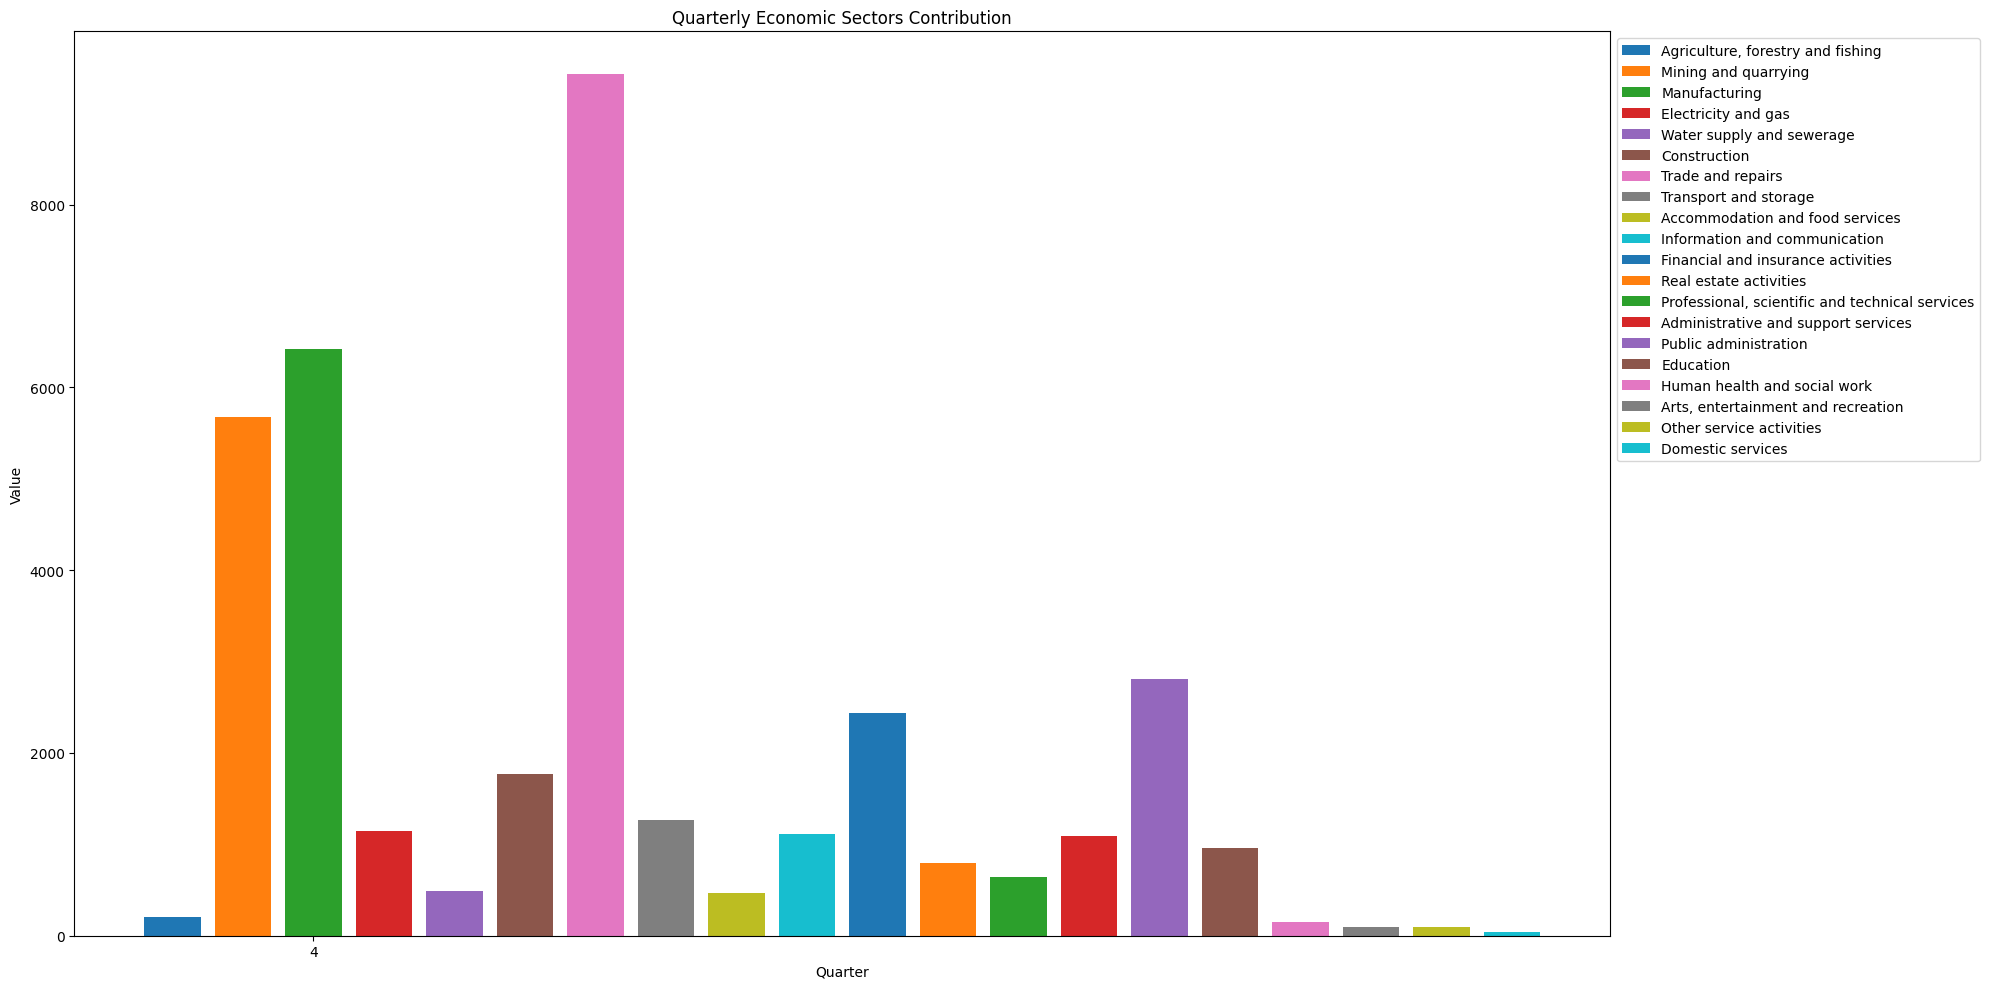

In [343]:
plt.figure(figsize=(20, 10))

# Plot bars
for column in columns_to_plot:
    plt.bar(filtered_df_2022_Q4['Quarter'] + (columns_to_plot.index(column) - 2) * 0.15, filtered_df_2022_Q4[column], width=0.12, label=column)


plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Quarterly Economic Sectors Contribution')
plt.xticks(filtered_df_2022_Q4['Quarter'])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

### Bar Chart Showing total gpd by year and quarter

In [344]:

concat_frame = pd.concat([gdp_clean['Year'], gdp_clean['Quarter'], gdp_clean['Total GDP']], axis=1)

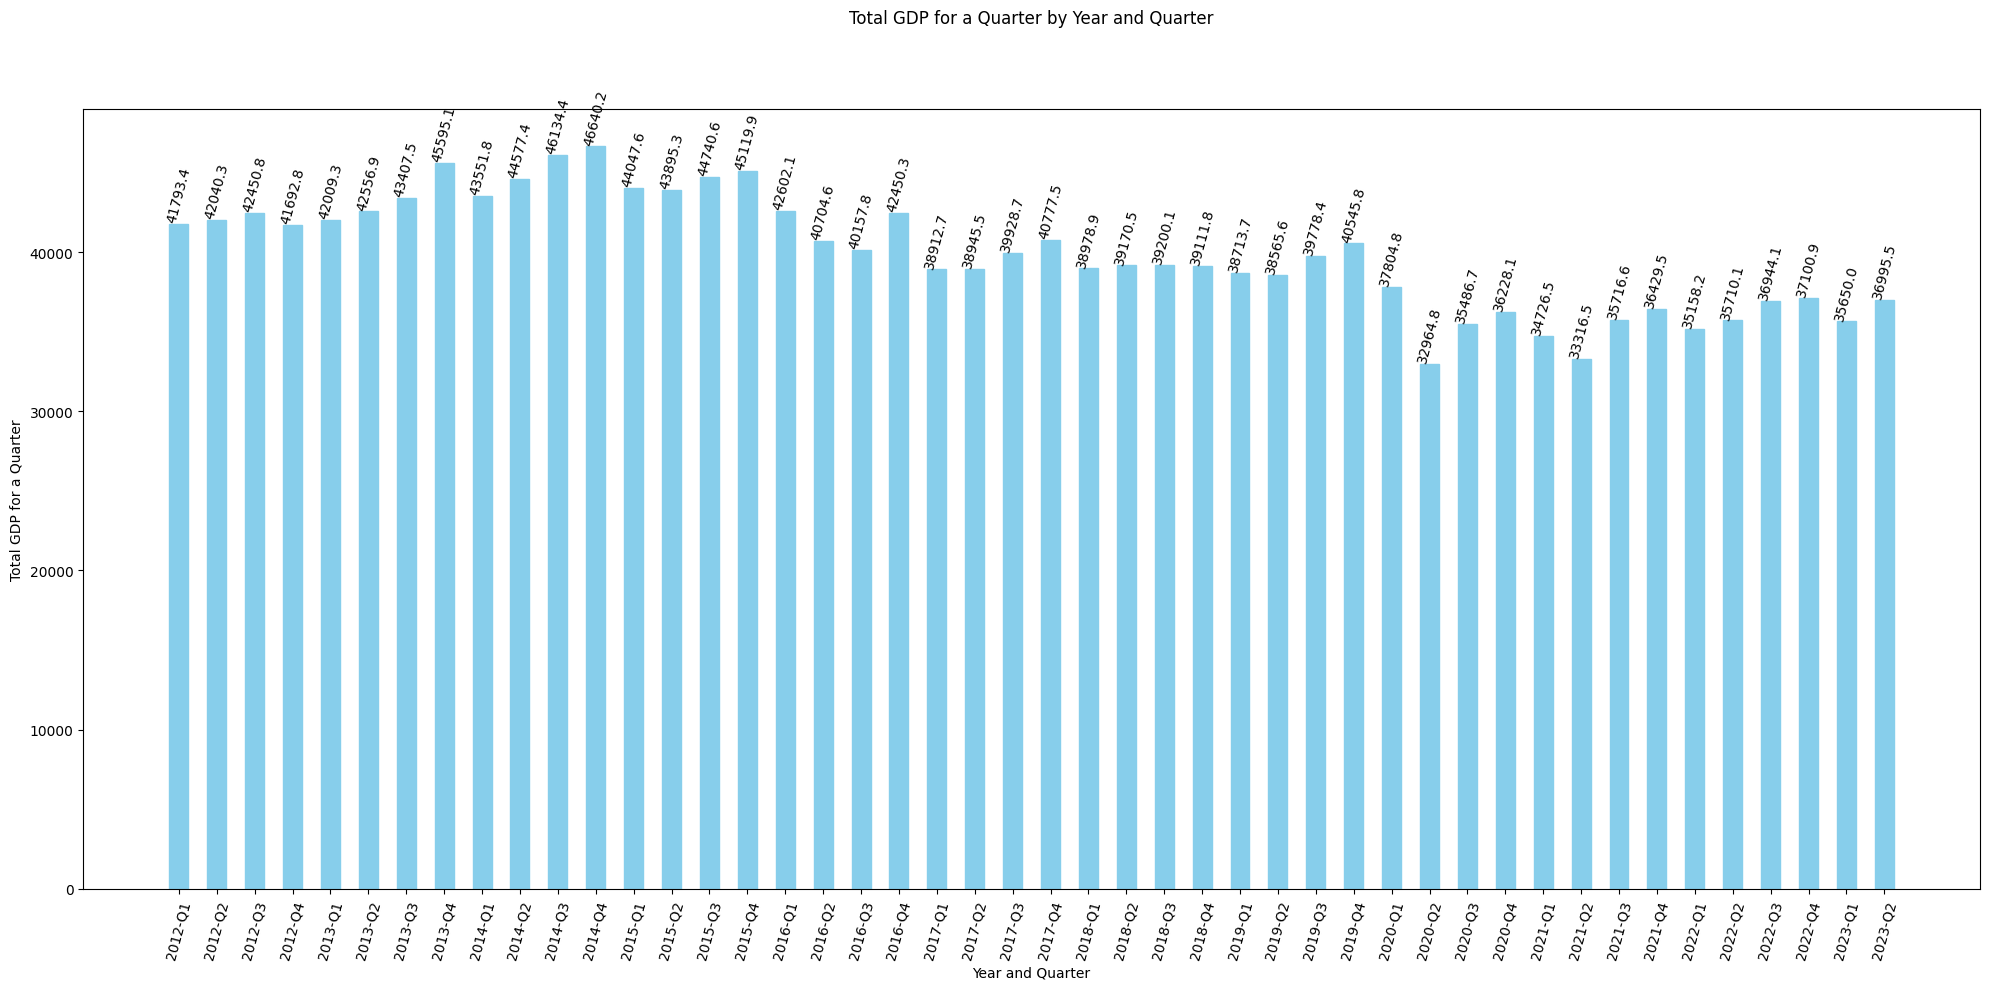

In [345]:
concat_frame['Year_Quarter'] = gdp_clean['Year'].astype(str) + '-Q' + gdp_clean['Quarter'].astype(str)
yearly_gdp = concat_frame.groupby('Year_Quarter')['Total GDP'].sum()

gdp_by_year_quarter = pd.DataFrame({'Year_Quarter': yearly_gdp.index, 'Total_GDP': yearly_gdp.values})

plt.figure(figsize=(20, 10))
plt.bar(gdp_by_year_quarter['Year_Quarter'], gdp_by_year_quarter['Total_GDP'], color='skyblue', width = 0.5, edgecolor='skyblue')

for i in range(len(gdp_by_year_quarter)):
    plt.text(gdp_by_year_quarter['Year_Quarter'][i], gdp_by_year_quarter['Total_GDP'][i], str(gdp_by_year_quarter['Total_GDP'][i]), ha='center', va='bottom', rotation=75)

# Adding labels and title
plt.xlabel('Year and Quarter')
plt.ylabel('Total GDP for a Quarter')
plt.title('Total GDP for a Quarter by Year and Quarter', y = 1.1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)
# Show plot
plt.tight_layout()
plt.show()

### Pie charts Showing Sectoral contributions for 2012 and 2022

In [346]:
#get average gdp for 2012
filtered_df_2012_pie = gdp_clean[gdp_clean['Year'] == 2012]
mean_2012=filtered_df_2012_pie.mean()

total_gdp_2012 = mean_2012[22]
print(total_gdp_2012)

41994.325000000004


In [347]:
numeric_values=[]
for col in mean_2012[2:22]:
    numeric_values.append(col)
print(numeric_values)

[285.775, 8841.425, 7633.549999999999, 1291.475, 514.275, 2152.425, 9950.0, 1341.5, 534.975, 964.5999999999999, 2331.925, 755.5, 592.45, 839.6500000000001, 2689.6000000000004, 910.175, 147.52499999999998, 94.425, 83.0, 40.05]


In [348]:
gdp_percentages = [(value / total_gdp_2012) * 100 for value in numeric_values]
# gdp_percentages
for sector, percentage in zip(columns_to_plot, gdp_percentages):
    print(f"{sector}: {percentage:.2f}%")

Agriculture, forestry and fishing: 0.68%
Mining and quarrying: 21.05%
Manufacturing: 18.18%
Electricity and gas: 3.08%
Water supply and sewerage: 1.22%
Construction: 5.13%
Trade and repairs: 23.69%
Transport and storage: 3.19%
Accommodation and food services: 1.27%
Information and communication: 2.30%
Financial and insurance activities: 5.55%
Real estate activities: 1.80%
Professional, scientific and technical services: 1.41%
Administrative and support services: 2.00%
Public administration: 6.40%
Education: 2.17%
Human health and social work: 0.35%
Arts, entertainment and recreation: 0.22%
Other service activities: 0.20%
Domestic services: 0.10%


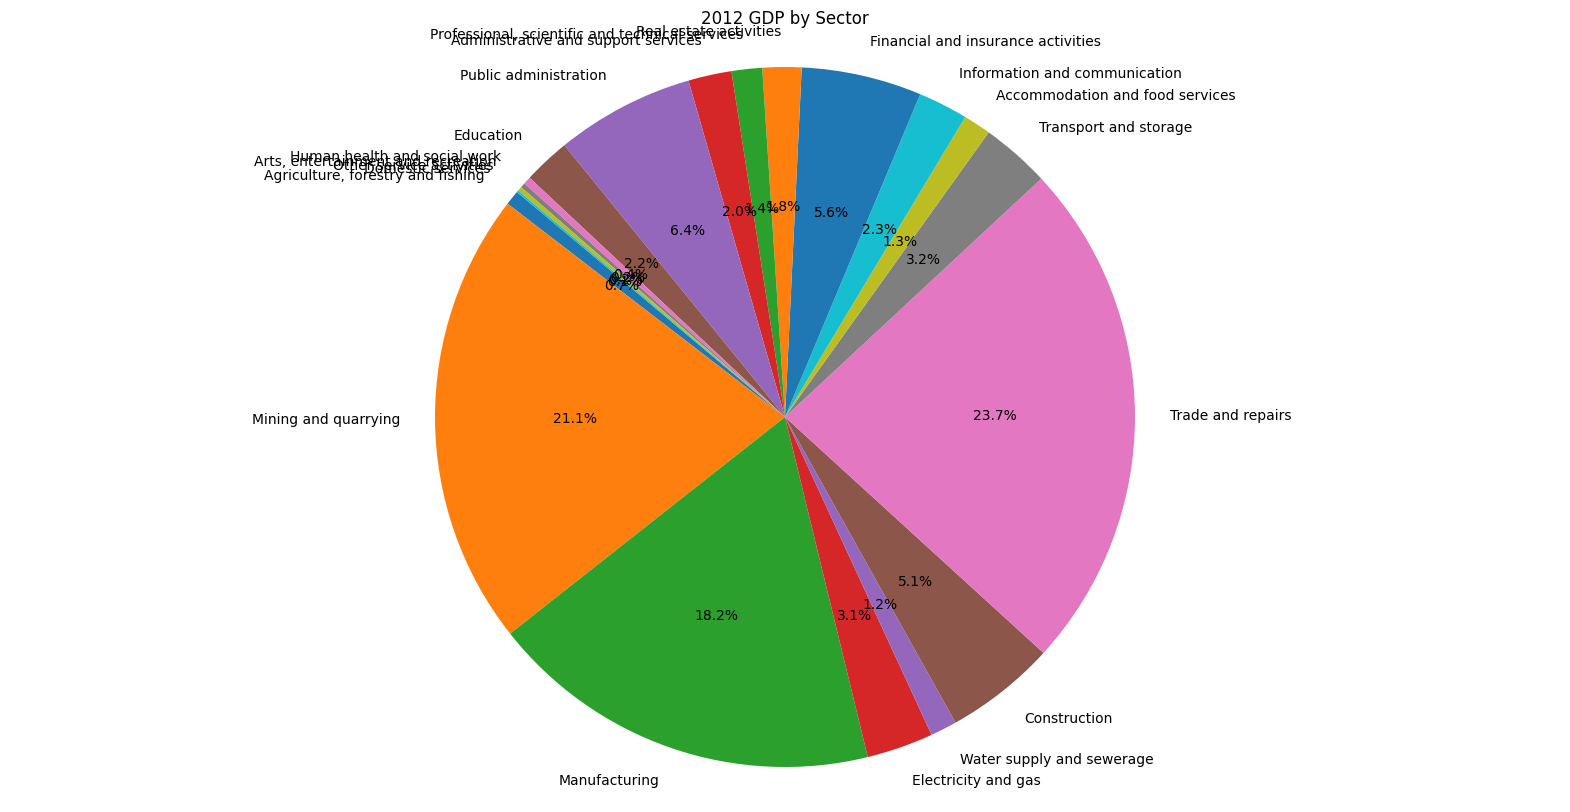

In [349]:
# Create a pie chart
plt.figure(figsize=(20, 10))
plt.pie(gdp_percentages, labels = columns_to_plot, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('2012 GDP by Sector')
# plt.tight_layout(pad=3.0)
# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Pie Chart for 2012 GDP by sector removing labels of those with threshold less than 1.5%

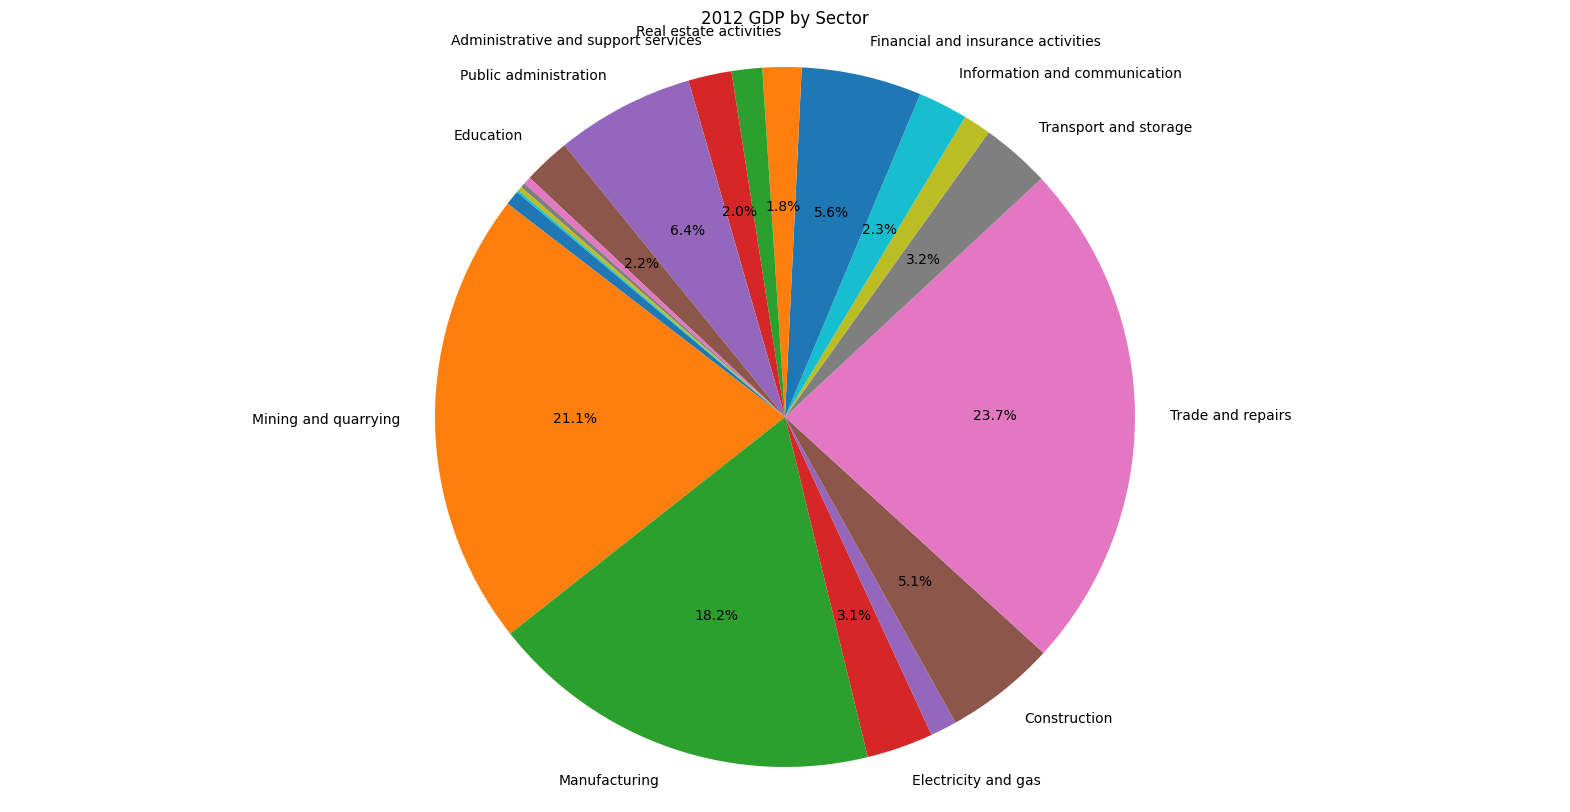

In [350]:
# Your data and plot setup
threshold_percent = 1.5  # Set the threshold percentage here
plt.figure(figsize=(20, 10))

def my_autopct(pct):
    return '{:.1f}%'.format(pct) if pct > threshold_percent else ''

autopct = my_autopct

wedge, texts, autotexts = plt.pie(gdp_percentages, labels=columns_to_plot, autopct=autopct, startangle=140)

# Filter labels and percentages based on percentage (corrected approach)
filtered_texts = [t for t, pct in zip(texts, gdp_percentages) if pct > threshold_percent]
filtered_autotexts = [at for at, pct in zip(autotexts, gdp_percentages) if pct > threshold_percent]

# Set visibility of non-filtered labels and percentages to False
for text in texts:
    text.set_visible(False)
for autotext in autotexts:
    autotext.set_visible(False)

# Set visibility of filtered labels and percentages to True
for text in filtered_texts:
    text.set_visible(True)
for autotext in filtered_autotexts:
    autotext.set_visible(True)

plt.title('2012 GDP by Sector')
plt.axis('equal')

plt.show()

In [351]:
#get average gdp for 2022
filtered_df_2022_pie = gdp_clean[gdp_clean['Year'] == 2022]
mean_2022=filtered_df_2022_pie.mean()

total_gdp_2022 = mean_2022[22]
print(total_gdp_2022)

36228.325


In [352]:
numeric_values=[]
for col in mean_2022[2:22]:
    numeric_values.append(col)
print(numeric_values)

[203.5, 5751.9, 6406.000000000001, 1148.525, 497.05, 1885.25, 8415.325, 1163.575, 466.0, 1105.875, 2457.575, 791.9, 664.7249999999999, 1088.975, 2832.625, 957.575, 149.825, 95.775, 101.5, 44.925]


In [353]:
gdp_percentages = [(value / total_gdp_2022) * 100 for value in numeric_values]
# gdp_percentages
for sector, percentage in zip(columns_to_plot, gdp_percentages):
    print(f"{sector}: {percentage:.2f}%")

Agriculture, forestry and fishing: 0.56%
Mining and quarrying: 15.88%
Manufacturing: 17.68%
Electricity and gas: 3.17%
Water supply and sewerage: 1.37%
Construction: 5.20%
Trade and repairs: 23.23%
Transport and storage: 3.21%
Accommodation and food services: 1.29%
Information and communication: 3.05%
Financial and insurance activities: 6.78%
Real estate activities: 2.19%
Professional, scientific and technical services: 1.83%
Administrative and support services: 3.01%
Public administration: 7.82%
Education: 2.64%
Human health and social work: 0.41%
Arts, entertainment and recreation: 0.26%
Other service activities: 0.28%
Domestic services: 0.12%


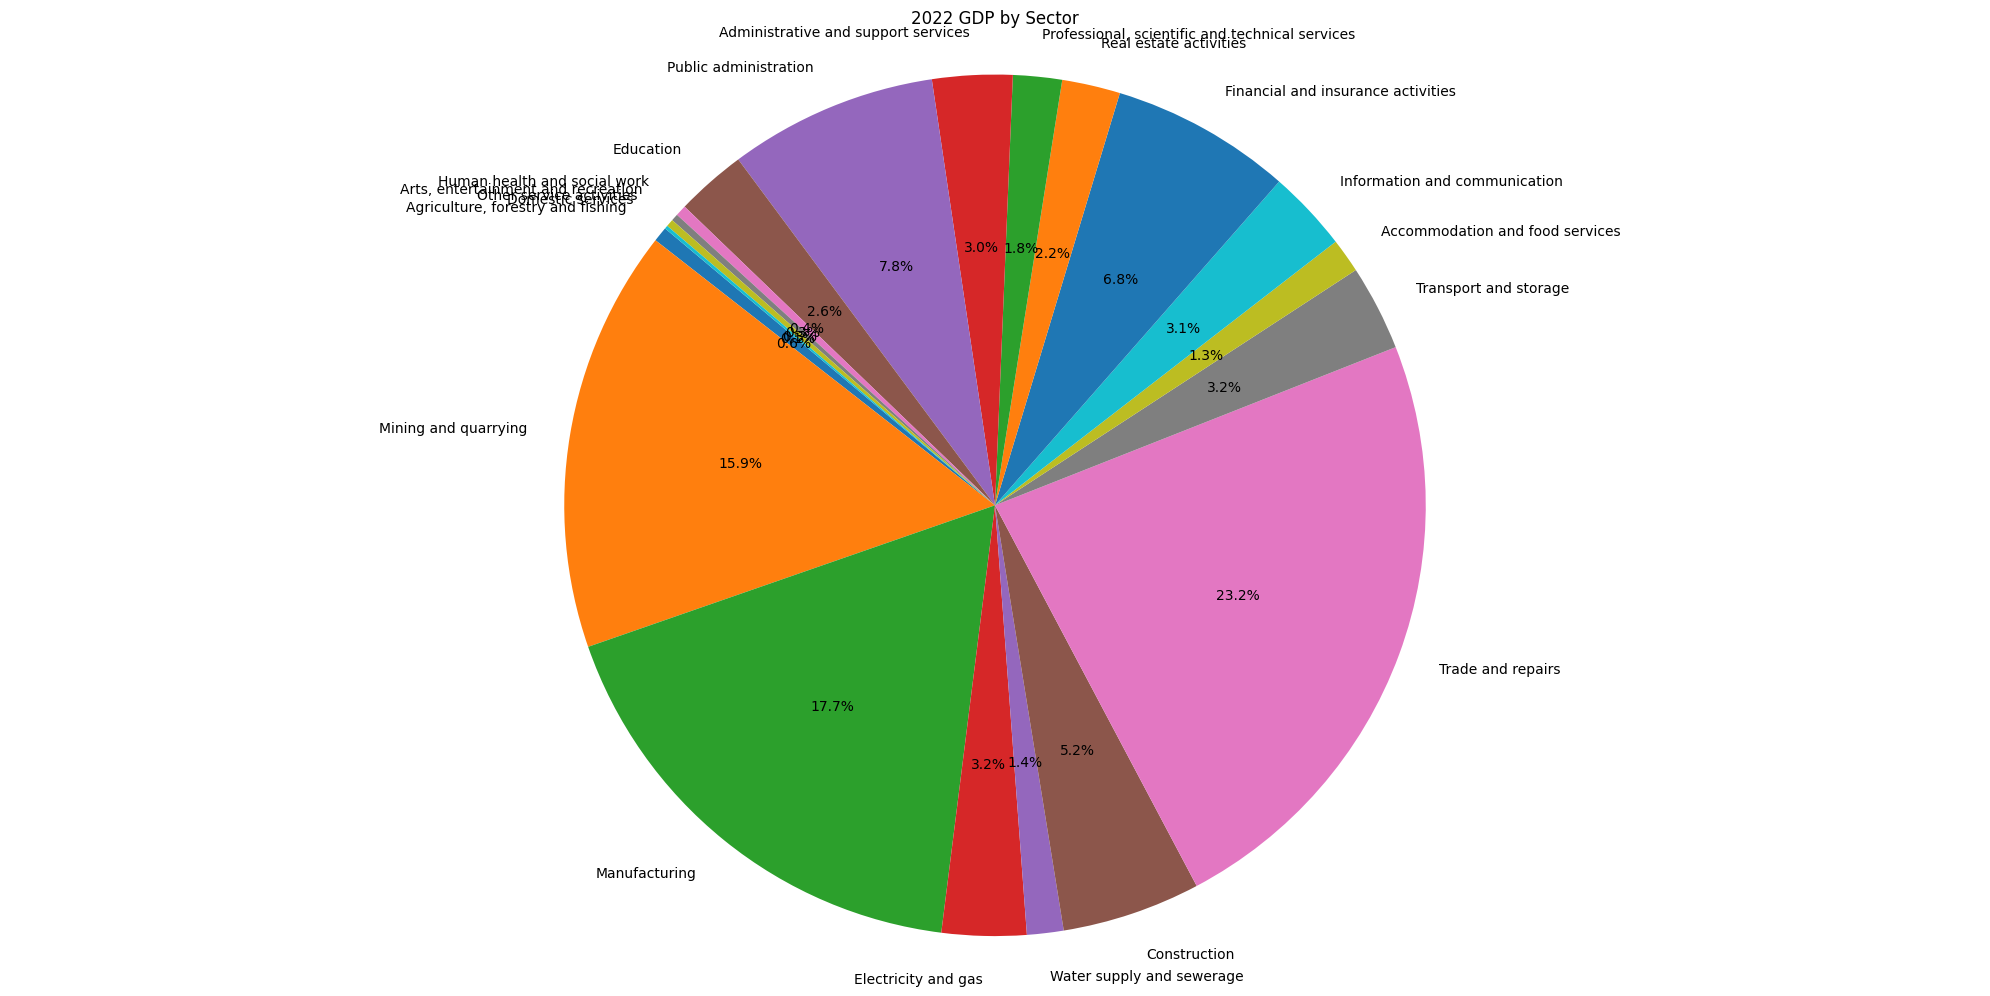

In [354]:
# Create a pie chart
plt.figure(figsize=(20, 10))
plt.pie(gdp_percentages, labels = columns_to_plot, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('2022 GDP by Sector')
plt.tight_layout()
# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Pie Chart for 2022 GDP by sector removing labels of those with threshold less than 2%

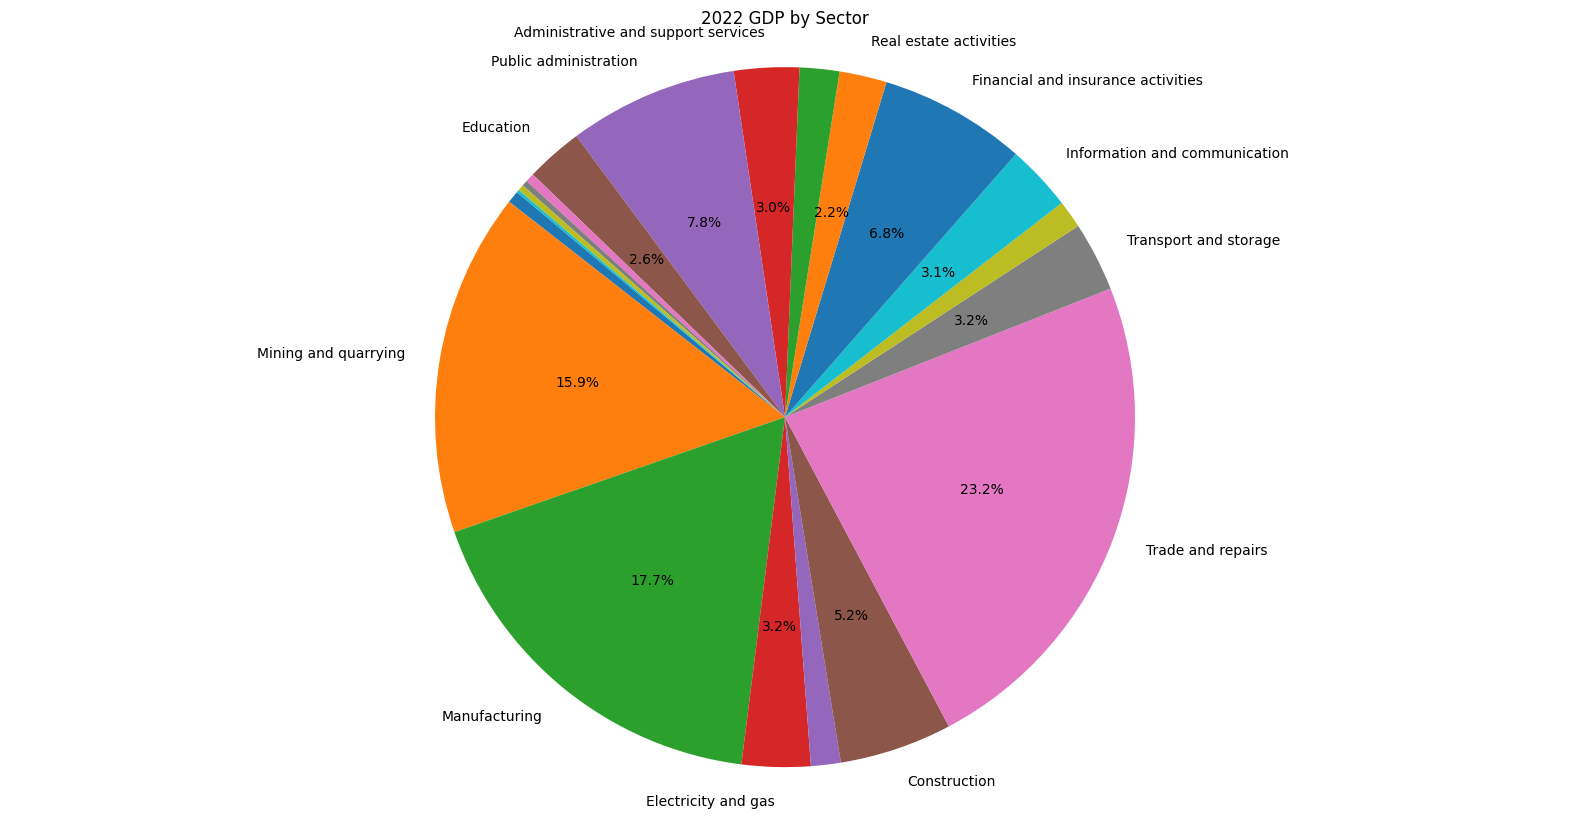

In [355]:
# Your data and plot setup
threshold_percent = 2  # Set the threshold percentage here
plt.figure(figsize=(20, 10))

def my_autopct(pct):
    return '{:.1f}%'.format(pct) if pct > threshold_percent else ''

autopct = my_autopct

wedge, texts, autotexts = plt.pie(gdp_percentages, labels=columns_to_plot, autopct=autopct, startangle=140)

# Filter labels and percentages based on percentage (corrected approach)
filtered_texts = [t for t, pct in zip(texts, gdp_percentages) if pct > threshold_percent]
filtered_autotexts = [at for at, pct in zip(autotexts, gdp_percentages) if pct > threshold_percent]

# Set visibility of non-filtered labels and percentages to False
for text in texts:
    text.set_visible(False)
for autotext in autotexts:
    autotext.set_visible(False)

# Set visibility of filtered labels and percentages to True
for text in filtered_texts:
    text.set_visible(True)
for autotext in filtered_autotexts:
    autotext.set_visible(True)

plt.title('2022 GDP by Sector')
plt.axis('equal')

plt.show()

Based on the pie charts above Trade and repairs, Manufacturing and Mining and quarrying are the top 3 sectors

### Line chart showing contributions of top 3 sectors in the past 5 years

In [356]:
#get values for the past 5 years
past_five_years = gdp_clean[gdp_clean['Year'] >= 2017]
columns=['Year','Quarter','Trade and repairs','Manufacturing','Mining and quarrying']
past_five_years[columns]


Year  Quarter  Trade and repairs  Manufacturing  Mining and quarrying
20  2017        1             8790.4         6845.3                7560.7
21  2017        2             8836.8         6982.8                7262.8
22  2017        3             9089.9         7452.0                7597.7
23  2017        4             9944.1         7409.4                7427.3
24  2018        1             8124.4         7314.9                7546.3
25  2018        2             8574.5         7329.5                7259.0
26  2018        3             9147.5         7185.7                6968.4
27  2018        4             9915.1         6620.9                6816.6
28  2019        1             8822.4         7064.1                6953.3
29  2019        2             9072.1         6863.1                6738.2
30  2019        3             9702.5         7041.1                6960.5
31  2019        4            11014.4         6740.5                6863.1
32  2020        1             8753.4         6701.7                6559.4
33  2020        2             5906.3         6196.3                6013.6
34  2020        3             9044.7         5727.0                5926.4
35  2020        4            10193.0         5691.3                5650.6
36  2021        1             7873.4         5980.1                5901.5
37  2021        2             6554.7         6066.7                5708.6
38  2021        3             8315.8         6100.6                5589.9
39  2021        4             9207.6         6169.4                5669.7
40  2022        1             7691.1         6308.3                5573.5
41  2022        2             8118.8         6324.1                5683.4
42  2022        3             8426.2         6572.4                6079.8
43  2022        4             9425.2         6419.2                5670.9
44  2023        1             8386.3         6189.8                5630.0
45  2023        2             9153.4         6276.9                5572.6

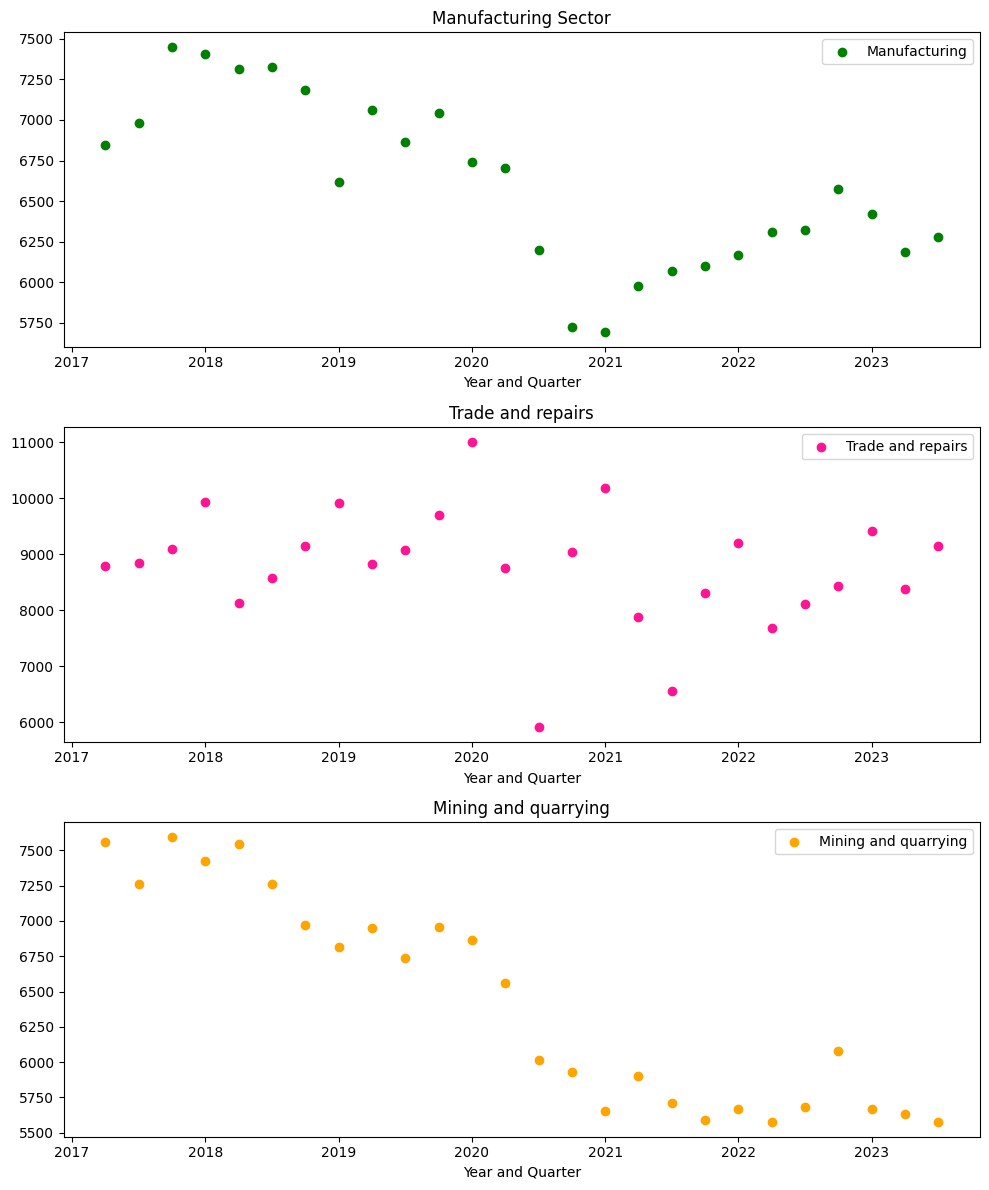

In [357]:
# Plotting the scatter plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plotting the Manufacturing sector on the first subplot
ax1.scatter(past_five_years['Year'] + past_five_years['Quarter'] * 0.25, past_five_years['Manufacturing'], marker='o', color='green', label='Manufacturing')
ax1.set_title('Manufacturing Sector')
ax1.set_xlabel('Year and Quarter')
ax1.legend()

# Plotting the Trade and repairs sector on the second subplot
ax2.scatter(past_five_years['Year'] + past_five_years['Quarter'] * 0.25, past_five_years['Trade and repairs'], marker='o', color='#FF1493' , label='Trade and repairs')
ax2.set_title('Trade and repairs')
ax2.set_xlabel('Year and Quarter')
ax2.legend()

# Plotting the Mining and quarrying sector on the third subplot
ax3.scatter(past_five_years['Year'] + past_five_years['Quarter'] * 0.25, past_five_years['Mining and quarrying'], marker='o', color='orange', label='Mining and quarrying')
ax3.set_title('Mining and quarrying')
ax3.set_xlabel('Year and Quarter')
ax3.legend()


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## TSA

### Brent Oil prices in 2012

In [358]:
brent_oil_df_2012 = brent_oil_df[brent_oil_df['Date'].dt.year == 2012]
brent_oil_df_2012


Symbol       Date    Open   Close
3065  Brent Oil 2012-01-03  108.35  112.13
3066  Brent Oil 2012-01-04  112.10  113.70
3067  Brent Oil 2012-01-05  113.50  112.74
3068  Brent Oil 2012-01-06  112.85  113.06
3069  Brent Oil 2012-01-09  113.42  112.45
...         ...        ...     ...     ...
3318  Brent Oil 2012-12-24  109.02  108.80
3319  Brent Oil 2012-12-26  109.15  111.07
3320  Brent Oil 2012-12-27  110.78  110.80
3321  Brent Oil 2012-12-28  111.24  110.62
3322  Brent Oil 2012-12-31  110.35  111.11

[258 rows x 4 columns]

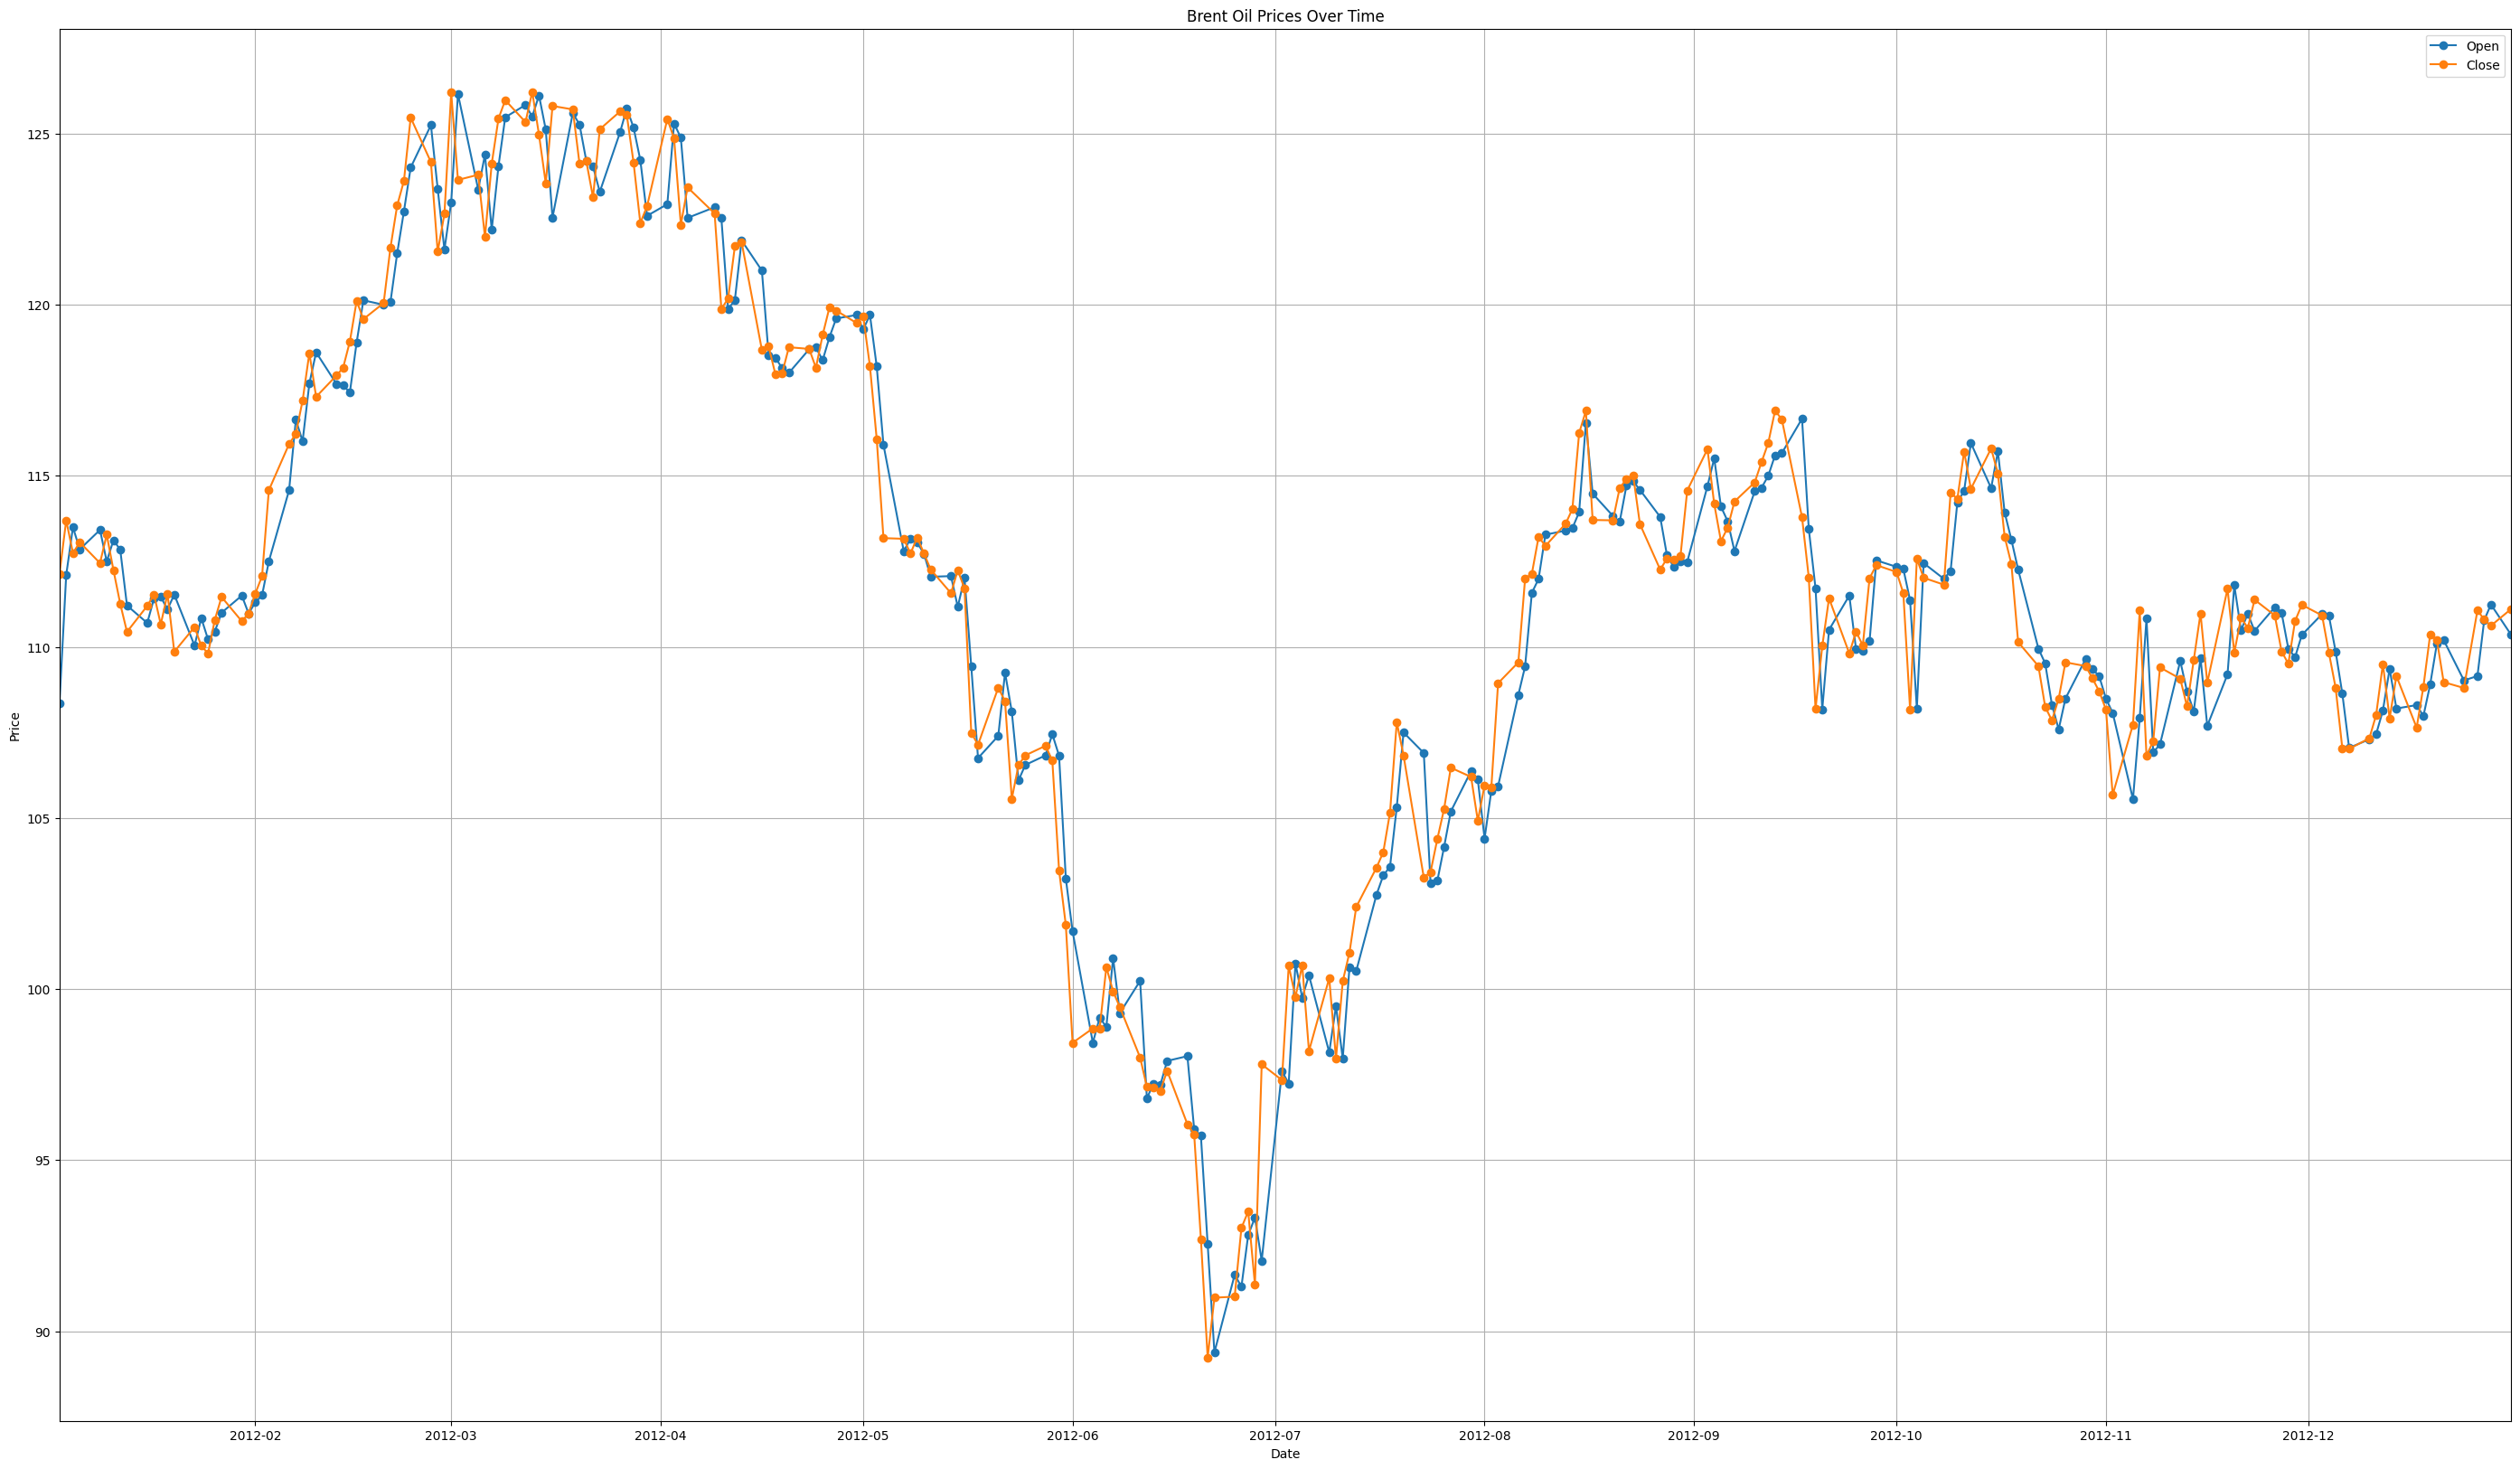

In [359]:
# Plotting
plt.figure(figsize=(35,20))

# Plot Open and Close prices over time
plt.plot(brent_oil_df_2012['Date'], brent_oil_df_2012['Open'], marker='o', linestyle='-', label='Open')
plt.plot(brent_oil_df_2012['Date'], brent_oil_df_2012['Close'], marker='o', linestyle='-', label='Close')

plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xlim(brent_oil_df_2012['Date'].iloc[0], brent_oil_df_2012['Date'].iloc[-1])  # Set limits from first date to last date in the dataset
plt.show()

### Brent Oil, Crude Oil and Natural Gas Prices for all years

In [360]:
# Get the unique dates present in each DataFrame
dates_brent_oil = set(brent_oil_df['Date'])
dates_crude_oil = set(crude_oil_df['Date'])
dates_natural_gas = set(natural_gas_df['Date'])
dates_heating_oil= set(heating_oil_df['Date'])

# Find the intersection of dates present in all three DataFrames
common_dates = dates_brent_oil.intersection(dates_crude_oil, dates_natural_gas,dates_heating_oil)

# Filter rows in each DataFrame to include only the common dates
brent_oil_filtered = brent_oil_df[brent_oil_df['Date'].isin(common_dates)]
crude_oil_filtered = crude_oil_df[crude_oil_df['Date'].isin(common_dates)]
natural_gas_filtered = natural_gas_df[natural_gas_df['Date'].isin(common_dates)]
heating_oil_filtered = heating_oil_df[heating_oil_df['Date'].isin(common_dates)]

# Merge the filtered DataFrames on the 'Date' column
merged_df = pd.merge(brent_oil_filtered, crude_oil_filtered, on='Date', how='inner')
merged_df = pd.merge(merged_df, natural_gas_filtered, on='Date', how='inner')
merged_df= pd.merge(merged_df, heating_oil_filtered, on='Date', how='inner', suffixes=('_gas', '_heating'))
merged_df


Symbol_x       Date  Open_x  Close_x       Symbol_y  Open_y  Close_y  \
0     Brent Oil 2000-01-04   23.90    24.39  Crude Oil WTI   25.20    25.55   
1     Brent Oil 2000-01-05   24.25    23.73  Crude Oil WTI   25.50    24.91   
2     Brent Oil 2000-01-06   23.55    23.62  Crude Oil WTI   24.80    24.78   
3     Brent Oil 2000-01-07   23.57    23.09  Crude Oil WTI   24.65    24.22   
4     Brent Oil 2000-01-10   23.04    23.73  Crude Oil WTI   24.22    24.67   
...         ...        ...     ...      ...            ...     ...      ...   
5668  Brent Oil 2022-06-13  121.94   122.27  Crude Oil WTI  120.19   120.93   
5669  Brent Oil 2022-06-14  121.88   121.17  Crude Oil WTI  121.09   118.93   
5670  Brent Oil 2022-06-15  120.79   118.51  Crude Oil WTI  119.07   115.31   
5671  Brent Oil 2022-06-16  119.65   119.81  Crude Oil WTI  115.98   117.59   
5672  Brent Oil 2022-06-17  119.13   113.12  Crude Oil WTI  117.08   109.56   

       Symbol_gas  Open_gas  Close_gas Symbol_heating  Open_heating  \
0     Natural Gas     2.130      2.176    Heating Oil        0.6720   
1     Natural Gas     2.180      2.168    Heating Oil        0.6790   
2     Natural Gas     2.165      2.196    Heating Oil        0.6645   
3     Natural Gas     2.195      2.173    Heating Oil        0.6600   
4     Natural Gas     2.180      2.216    Heating Oil        0.6445   
...           ...       ...        ...            ...           ...   
5668  Natural Gas     8.920      8.609    Heating Oil        4.3612   
5669  Natural Gas     8.686      7.189    Heating Oil        4.2749   
5670  Natural Gas     7.269      7.420    Heating Oil        4.3816   
5671  Natural Gas     7.540      7.464    Heating Oil        4.5320   
5672  Natural Gas     7.454      6.944    Heating Oil        4.5719   

      Close_heating  
0            0.6778  
1            0.6655  
2            0.6628  
3            0.6475  
4            0.6472  
...             ...  
5668         4.2834  
5669         4.3940  
5670         4.5470  
5671         4.5713  
5672         4.3398  

[5673 rows x 13 columns]

In [361]:
open_only = merged_df[['Date', 'Open_x', 'Open_y', 'Open_gas','Open_heating']]
open_only.columns = ['Date', 'OpeBrent Oil', 'Crude Oil WTI', 'Natural Gas','Heating Oil']


In [362]:
open_only.set_index('Date', inplace = True)

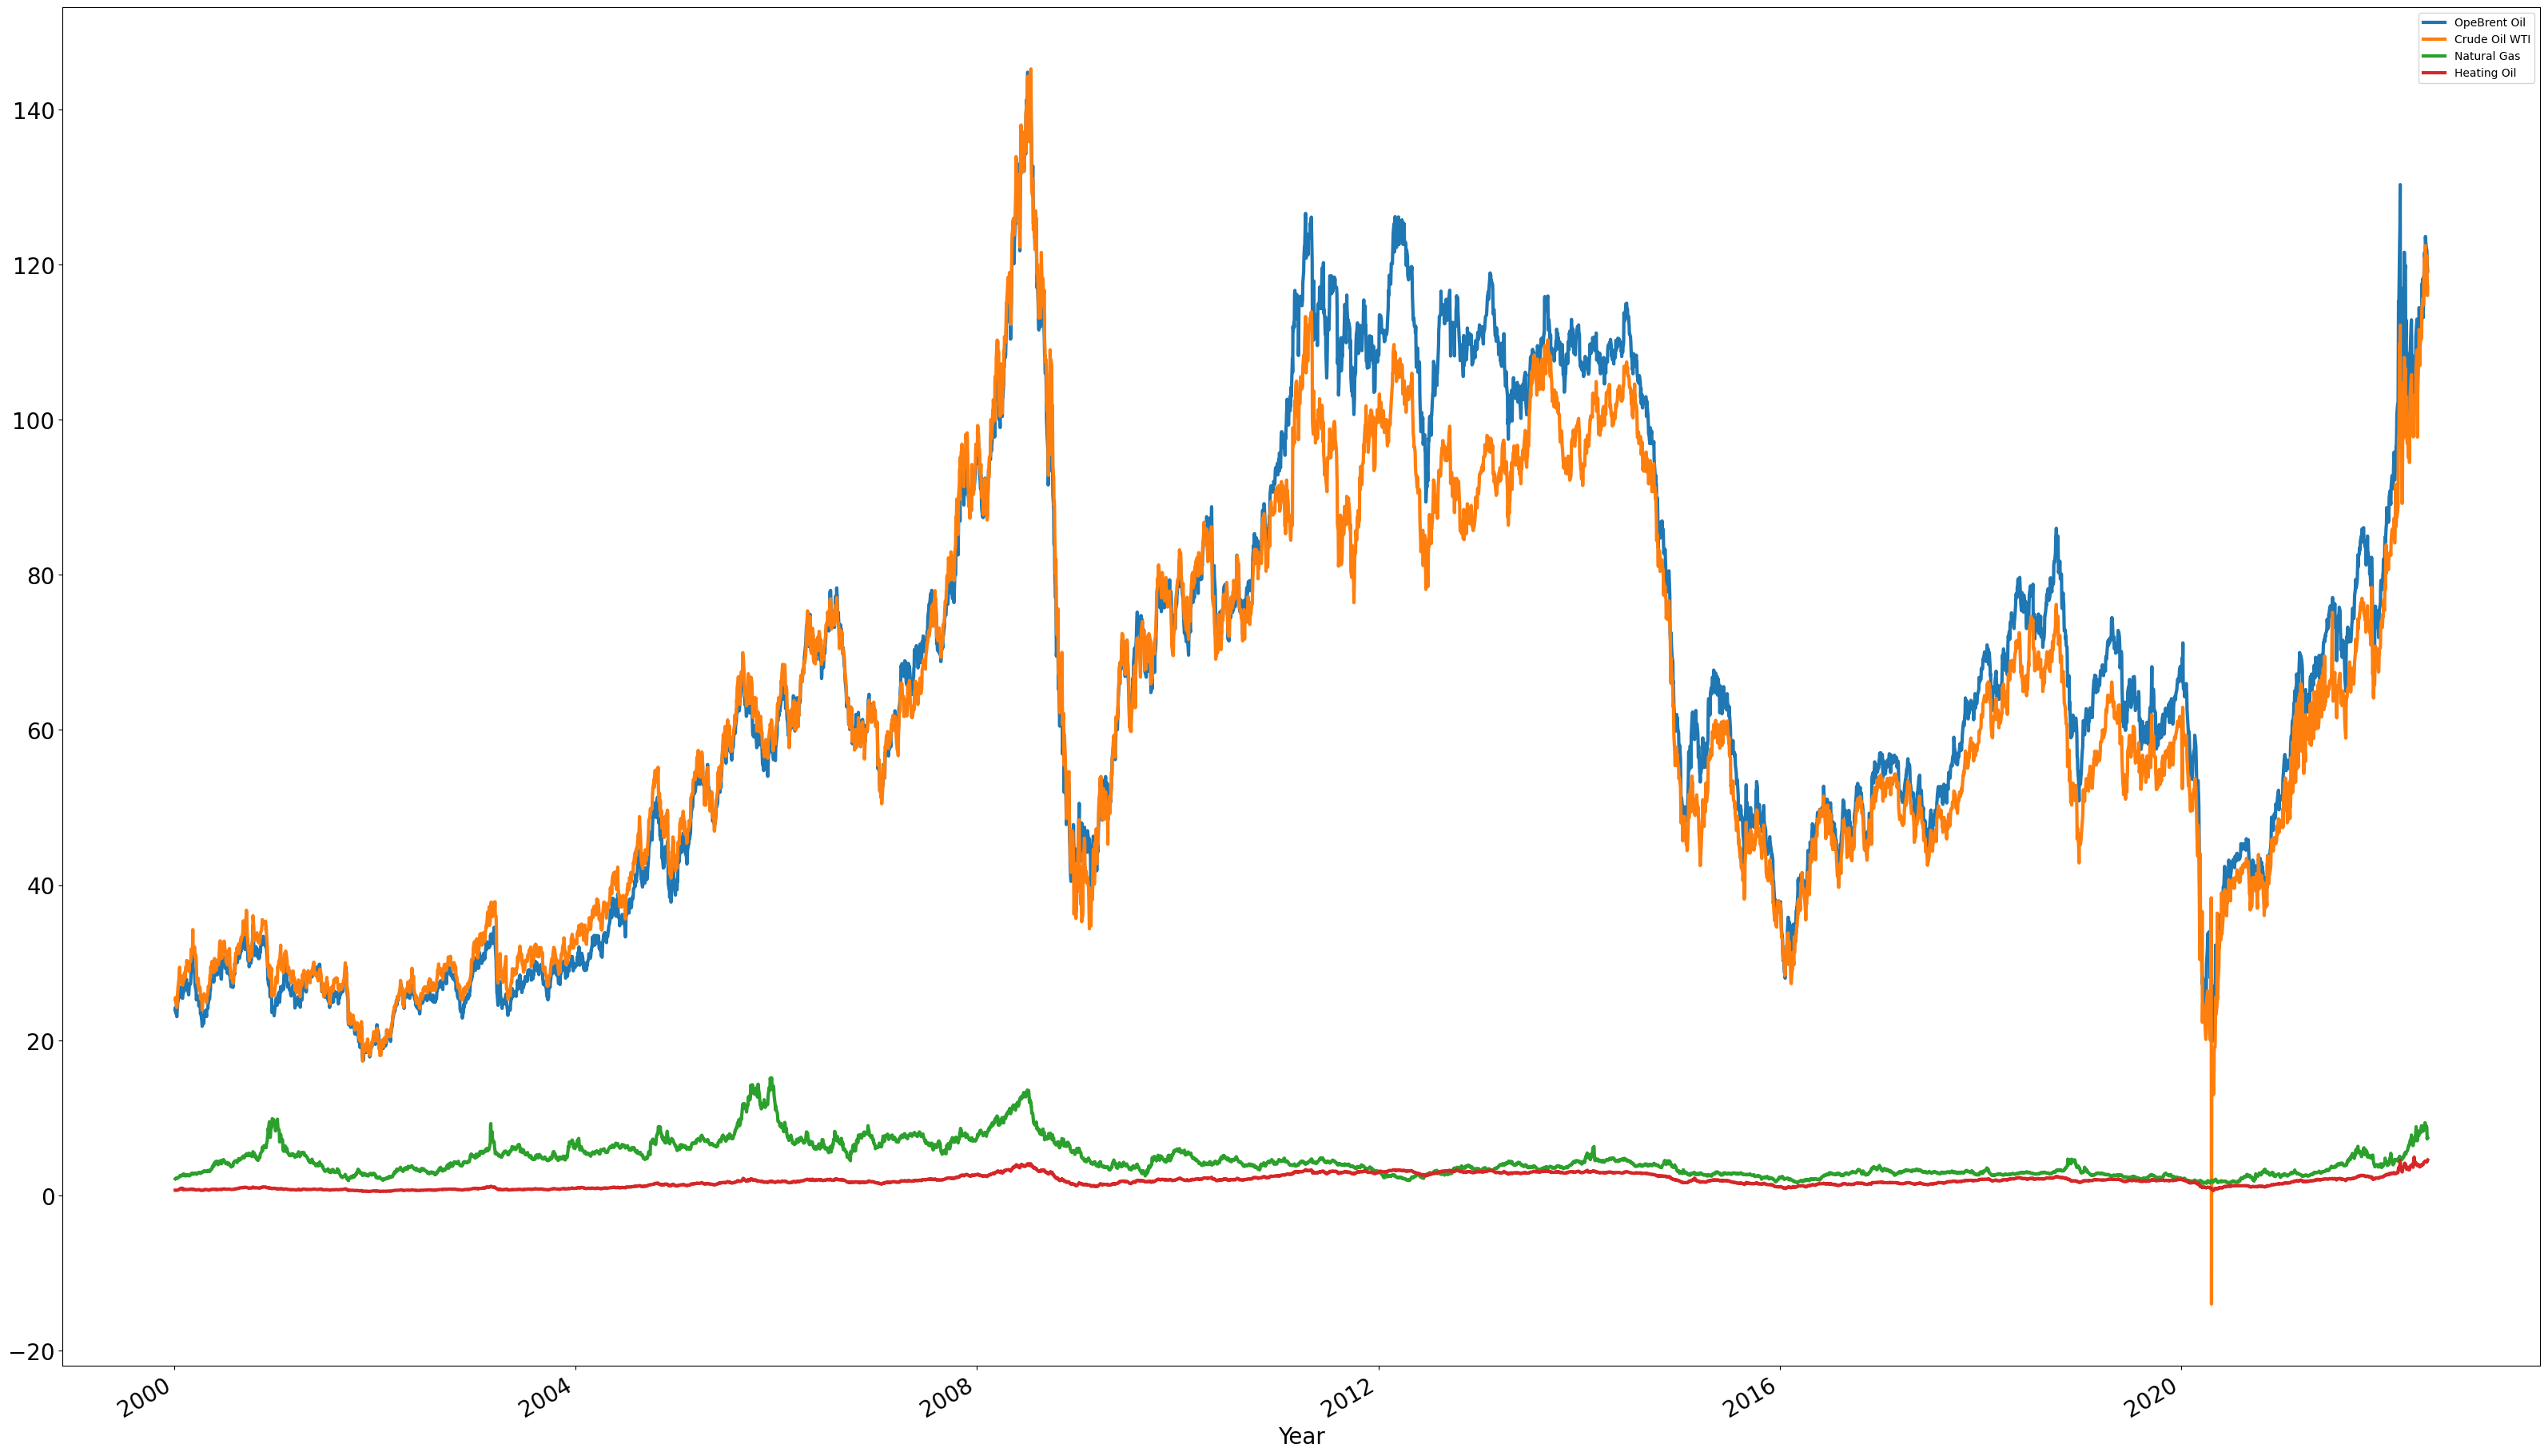

In [363]:
open_only.plot(figsize = (40,25), linewidth = 3, fontsize = 20)
plt.xlabel('Year', fontsize = 20);

### 2022 TSA

In [364]:
dates_2022 = merged_df['Date'].dt.year == 2022
merged_df_2022 = merged_df[dates_2022]
open_only_2022 = merged_df_2022[['Date', 'Open_x', 'Open_y', 'Open_gas','Open_heating']]
open_only_2022.columns = ['Date', 'Brent Oil', 'Crude Oil WTI', 'Natural Gas','Heating Oil']
open_only_2022

Date  Brent Oil  Crude Oil WTI  Natural Gas  Heating Oil
5554 2022-01-03      78.11          73.20        3.702       2.3283
5555 2022-01-04      78.91          73.88        3.817       2.3607
5556 2022-01-05      80.07          74.91        3.747       2.4114
5557 2022-01-06      80.22          74.57        3.842       2.4282
5558 2022-01-07      82.00          76.74        3.860       2.4790
...         ...        ...            ...          ...          ...
5668 2022-06-13     121.94         120.19        8.920       4.3612
5669 2022-06-14     121.88         121.09        8.686       4.2749
5670 2022-06-15     120.79         119.07        7.269       4.3816
5671 2022-06-16     119.65         115.98        7.540       4.5320
5672 2022-06-17     119.13         117.08        7.454       4.5719

[119 rows x 5 columns]

In [365]:
open_only_2022.set_index('Date', inplace = True)

Text(0.5, 0, 'Year')

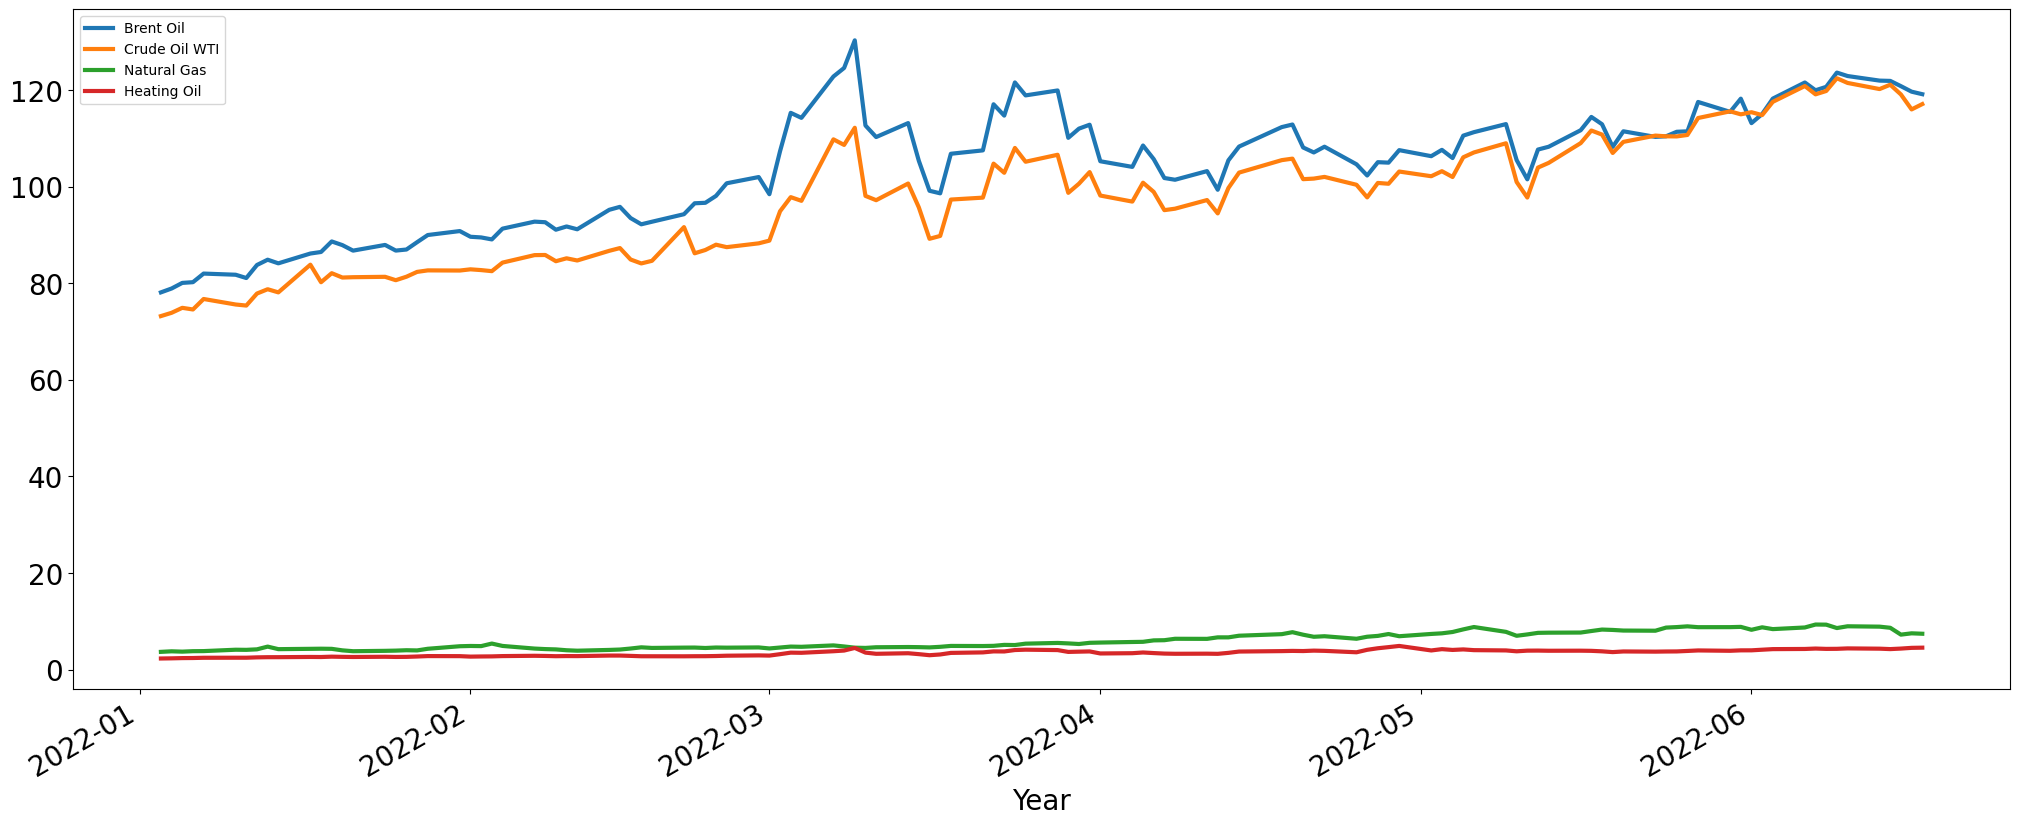

In [366]:
open_only_2022.plot(figsize = (25,10), linewidth = 3, fontsize = 20)
plt.xlabel('Year', fontsize = 20)

##correlation matrix for oil & gas prices and gdp


##Merging the oil gas and gdp data

In [367]:
# group oil and gas df by quarters in the year and assign the average to each quarter

#grouping filtered data set

# quarter_df_natural = natural_gas_filtered.groupby(natural_gas_filtered['Date'].dt.to_period('Q'))['Open'].mean()
# quarter_df_heating = heating_oil_filtered.groupby(heating_oil_filtered['Date'].dt.to_period('Q'))['Open'].mean()
# quarter_df_crude = crude_oil_filtered.groupby(crude_oil_filtered['Date'].dt.to_period('Q'))['Open'].mean()
# quarter_df_brent = brent_oil_filtered.groupby(brent_oil_filtered['Date'].dt.to_period('Q'))['Open'].mean()



quarter_df_natural = (natural_gas_filtered.groupby(natural_gas_filtered['Date'].dt.to_period('Q'))
                      ['Open'].mean().reset_index())
quarter_df_heating = (heating_oil_filtered.groupby(heating_oil_filtered['Date'].dt.to_period('Q'))
                      ['Open'].mean().reset_index())
quarter_df_crude = (crude_oil_filtered.groupby(crude_oil_filtered['Date'].dt.to_period('Q'))
                    ['Open'].mean().reset_index())
quarter_df_brent = (brent_oil_filtered.groupby(brent_oil_filtered['Date'].dt.to_period('Q'))
                    ['Open'].mean().reset_index())



#merging quarter data set with common quarters in GDP



In [368]:
#merging all filtered sets



# Merge the filtered DataFrames on the 'Date' column
merged_df = pd.merge(quarter_df_natural,  quarter_df_heating, on='Date', how='inner')
merged_df = pd.merge(merged_df, quarter_df_crude, on='Date', how='inner')
merged_df= pd.merge(merged_df, quarter_df_brent, on='Date', how='inner', suffixes=('_gas', '_heating'))
merged_df





Date    Open_x    Open_y    Open_gas  Open_heating
0   2000Q1  2.609242  0.757515   28.715645     26.498871
1   2000Q2  3.666967  0.738872   28.691639     26.868033
2   2000Q3  4.513607  0.885374   31.499836     30.341967
3   2000Q4  6.342984  0.978561   31.984918     30.130656
4   2001Q1  6.317516  0.784535   28.658226     26.270645
..     ...       ...       ...         ...           ...
85  2021Q2  2.964703  1.998048   63.175000     68.880781
86  2021Q3  4.282955  2.129377   65.662121     73.093333
87  2021Q4  4.880692  2.377348   72.542769     79.717077
88  2022Q1  4.532750  3.039908   88.711875     97.681875
89  2022Q2  7.686109  3.973338  107.542909    111.007091

[90 rows x 5 columns]

In [369]:
#puting the dates into the old data table
dates=pd.DataFrame(gdp_df[0])

dates = dates.iloc[2:]
dates.reset_index(inplace=True)
dates.rename(columns={'index': 'Date'}, inplace=True)

dates.head()

Date    0
0  2012-1  NaN
1  2012-2  NaN
2  2012-3  NaN
3  2012-4  NaN
4  2013-1  NaN

In [370]:
#changing format of grouped dates from Q's to -
merged_df['Date'] = merged_df['Date'].astype(str)


merged_df['Date'] = merged_df['Date'].str.replace('Q', '-')
merged_df.info()

quarterly_gdp = gdp_clean.drop('Year', axis=1)
quarterly_gdp= quarterly_gdp.drop('Quarter',axis=1)
quarterly_gdp = quarterly_gdp.assign(Date=dates['Date'])


#merging with gdp now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          90 non-null     object 
 1   Open_x        90 non-null     float64
 2   Open_y        90 non-null     float64
 3   Open_gas      90 non-null     float64
 4   Open_heating  90 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.6+ KB


In [371]:
merged_df = pd.merge(merged_df, quarterly_gdp, on='Date', how='left')
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date                                             90 non-null     object 
 1   Open_x                                           90 non-null     float64
 2   Open_y                                           90 non-null     float64
 3   Open_gas                                         90 non-null     float64
 4   Open_heating                                     90 non-null     float64
 5   Agriculture, forestry and fishing                42 non-null     float64
 6   Mining and quarrying                             42 non-null     float64
 7   Manufacturing                                    42 non-null     float64
 8   Electricity and gas                              42 non-null     float64
 9   Water supply and sewerage         

In [372]:
#droping nan values
merged_df.dropna(inplace=True)
merged_df.head()



Date    Open_x    Open_y    Open_gas  Open_heating  \
48  2012-1  2.516226  3.159355  103.100484    118.364839   
49  2012-2  2.347825  2.901737   93.628571    109.126667   
50  2012-3  2.892746  2.994471   92.081746    109.104286   
51  2012-4  3.547281  3.056977   88.229844    110.062813   
52  2013-1  3.473267  3.045040   94.274833    112.514500   

    Agriculture, forestry and fishing  Mining and quarrying  Manufacturing  \
48                              289.5                9212.6         7888.0   
49                              282.1                8893.6         7847.7   
50                              284.0                8773.2         7768.4   
51                              287.5                8486.3         7030.1   
52                              279.9                9024.4         7692.1   

    Electricity and gas  Water supply and sewerage  ...  \
48               1309.3                      512.3  ...   
49               1299.3                      509.3  ...   
50               1327.9                      513.2  ...   
51               1229.4                      522.3  ...   
52               1329.9                      485.1  ...   

    Real estate activities  Professional, scientific and technical services  \
48                   753.3                                            604.0   
49                   754.7                                            544.2   
50                   756.6                                            602.5   
51                   757.4                                            619.1   
52                   760.1                                            446.9   

    Administrative and support services  Public administration  Education  \
48                                779.6                 2687.4      903.4   
49                                801.2                 2682.8      905.4   
50                                856.3                 2701.3      914.3   
51                                921.5                 2686.9      917.6   
52                               1020.8                 2658.4      924.4   

    Human health and social work  Arts, entertainment and recreation  \
48                         147.4                                94.4   
49                         147.1                                94.1   
50                         147.9                                94.7   
51                         147.7                                94.5   
52                         148.0                                94.7   

    Other service activities  Domestic services  Total GDP  
48                      80.5               39.8    41793.4  
49                      83.2               40.0    42040.3  
50                      82.9               40.1    42450.8  
51                      85.4               40.3    41692.8  
52                      87.0               40.4    42009.3  

[5 rows x 26 columns]

In [373]:
#Correlation matrix for quarters

correlations=merged_df.drop(['Date'],axis=1)
correlations = correlations[['Open_x', 'Open_y', 'Open_gas', 'Open_heating', 'Total GDP']]
correlations.columns=['Brent Oil','Crude Oil', 'Natural Gas','Heating Oil','Total GDP']
correlations.corr()

Brent Oil  Crude Oil  Natural Gas  Heating Oil  Total GDP
Brent Oil     1.000000   0.708230     0.643526     0.586151  -0.001756
Crude Oil     0.708230   1.000000     0.976482     0.974711   0.249168
Natural Gas   0.643526   0.976482     1.000000     0.989259   0.314920
Heating Oil   0.586151   0.974711     0.989259     1.000000   0.309442
Total GDP    -0.001756   0.249168     0.314920     0.309442   1.000000

In [374]:
import seaborn as sn

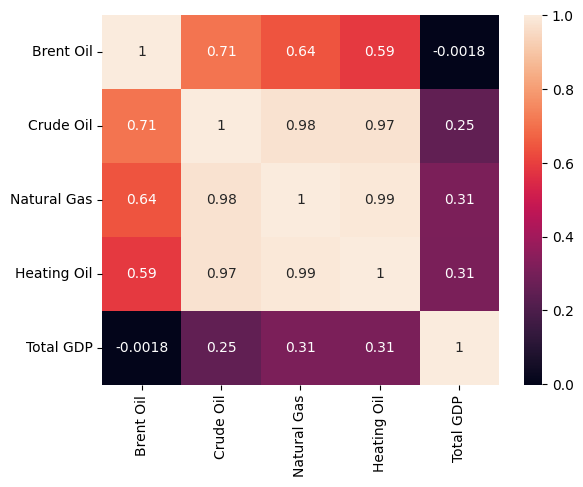

In [375]:

corrMatrix=correlations.corr()
sn.heatmap(corrMatrix,annot=True)
plt.show()

# Line Chart for Oil/Gas type Compared to GDP

In [376]:
gdp_full = gdp_clean[['Year', 'Quarter', 'Total GDP','Mining and quarrying','Trade and repairs','Manufacturing' ]].copy()
gdp_full['YearQuarter'] = gdp_full['Year'].astype(str) + ' Q' + gdp_full['Quarter'].astype(str)



3 Major industries vs GDP:
We see a major connection between trade and total gdp

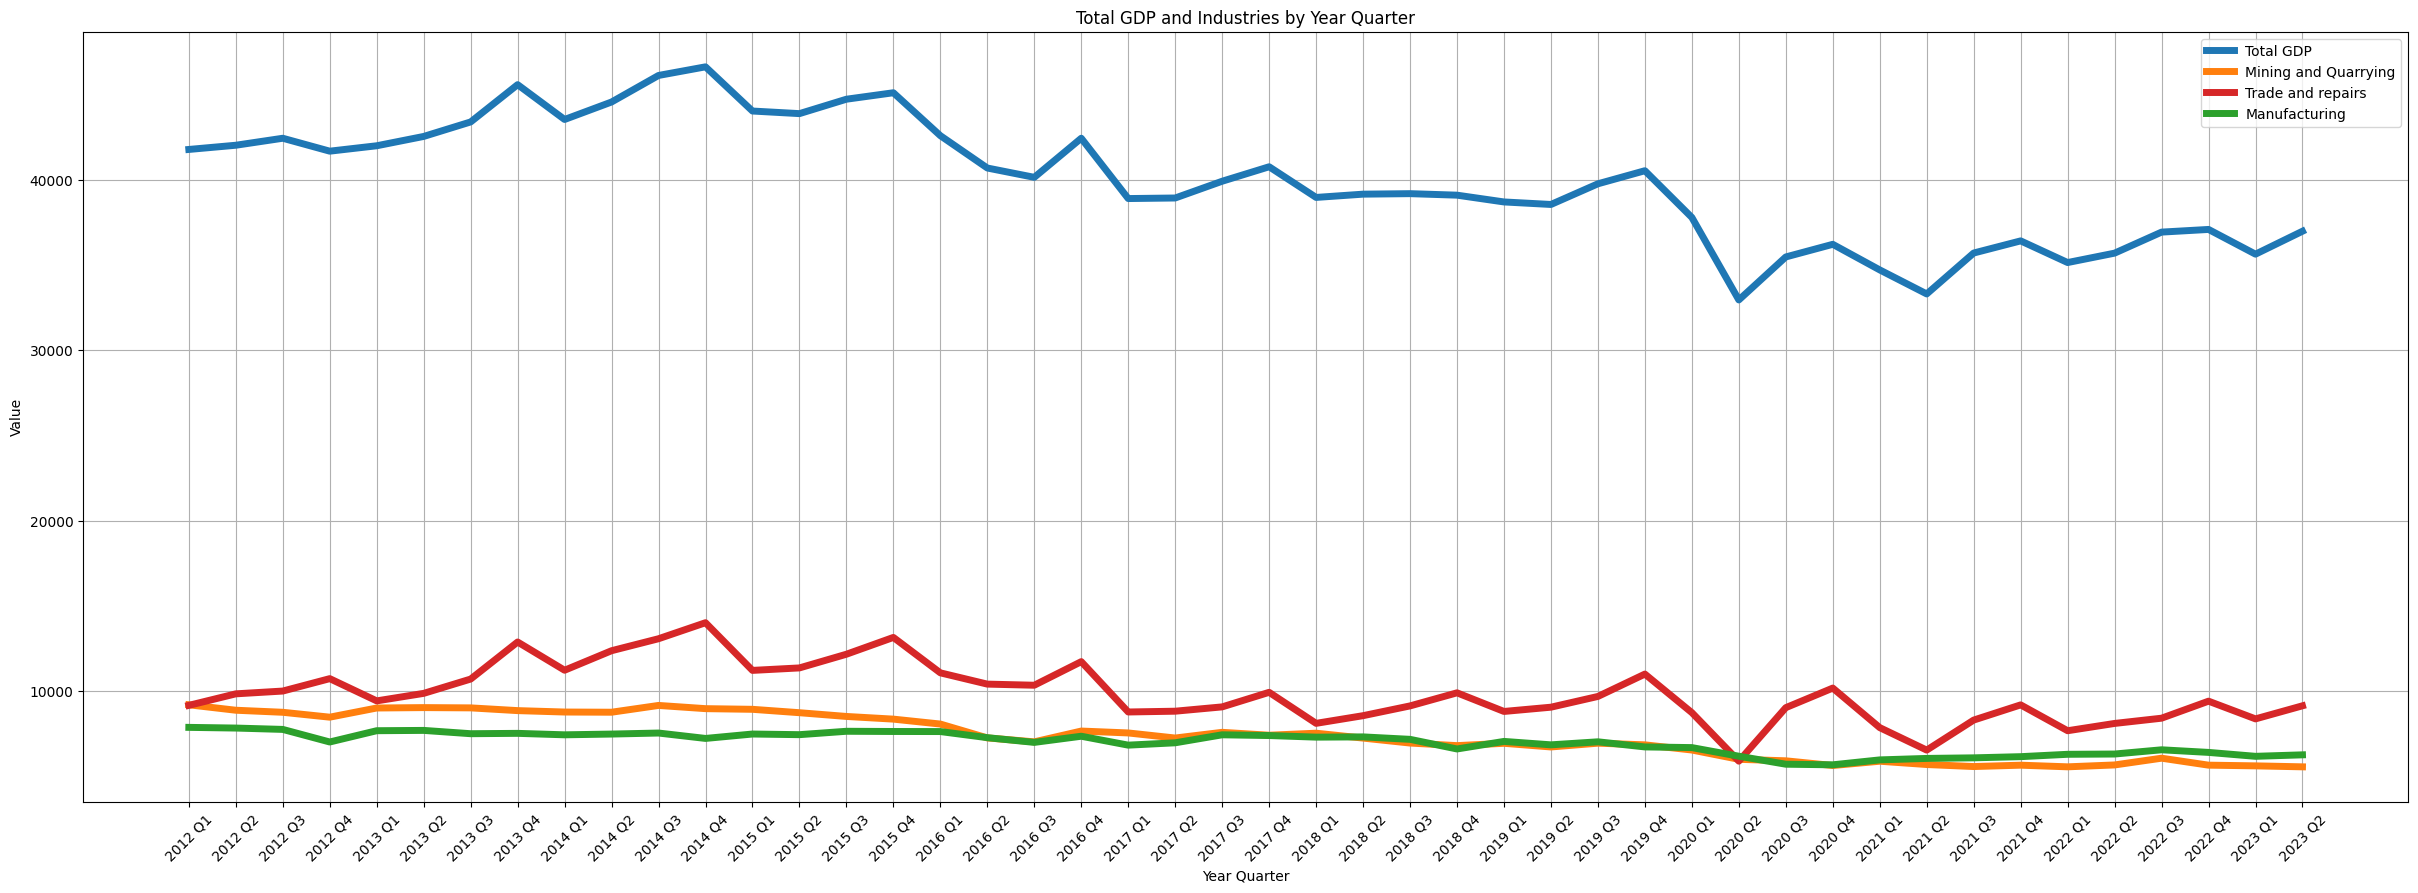

In [377]:
# Plotting using pandas plot function
ax = gdp_full.plot(x='YearQuarter', y='Total GDP', kind='line', figsize=(30, 10), linewidth=5)
gdp_full.plot(x='YearQuarter', y='Mining and quarrying', kind='line', ax=ax, color='tab:orange', linewidth=5)
gdp_full.plot(x='YearQuarter', y='Trade and repairs', kind='line', ax=ax, color='tab:red', linewidth=5)
gdp_full.plot(x='YearQuarter', y='Manufacturing', kind='line', ax=ax, color='tab:green', linewidth=5)
ax.set_xlabel('Year Quarter')
ax.set_ylabel('Value')
ax.set_title('Total GDP and Industries by Year Quarter')

# Set x-axis tick frequency to show every tick (value)
tick_interval = 1  # Change this value as needed
plt.xticks(range(0, len(gdp_full), tick_interval), gdp_full['YearQuarter'][::tick_interval], rotation=45)
plt.grid(True)
plt.legend(['Total GDP', 'Mining and Quarrying','Trade and repairs','Manufacturing' ])
plt.show()

In [378]:
gdp_sml_in = gdp_clean[['Year', 'Quarter', 'Total GDP','Public administration','Financial and insurance activities','Construction' ]].copy()
gdp_sml_in['YearQuarter'] = gdp_full['Year'].astype(str) + ' Q' + gdp_full['Quarter'].astype(str)


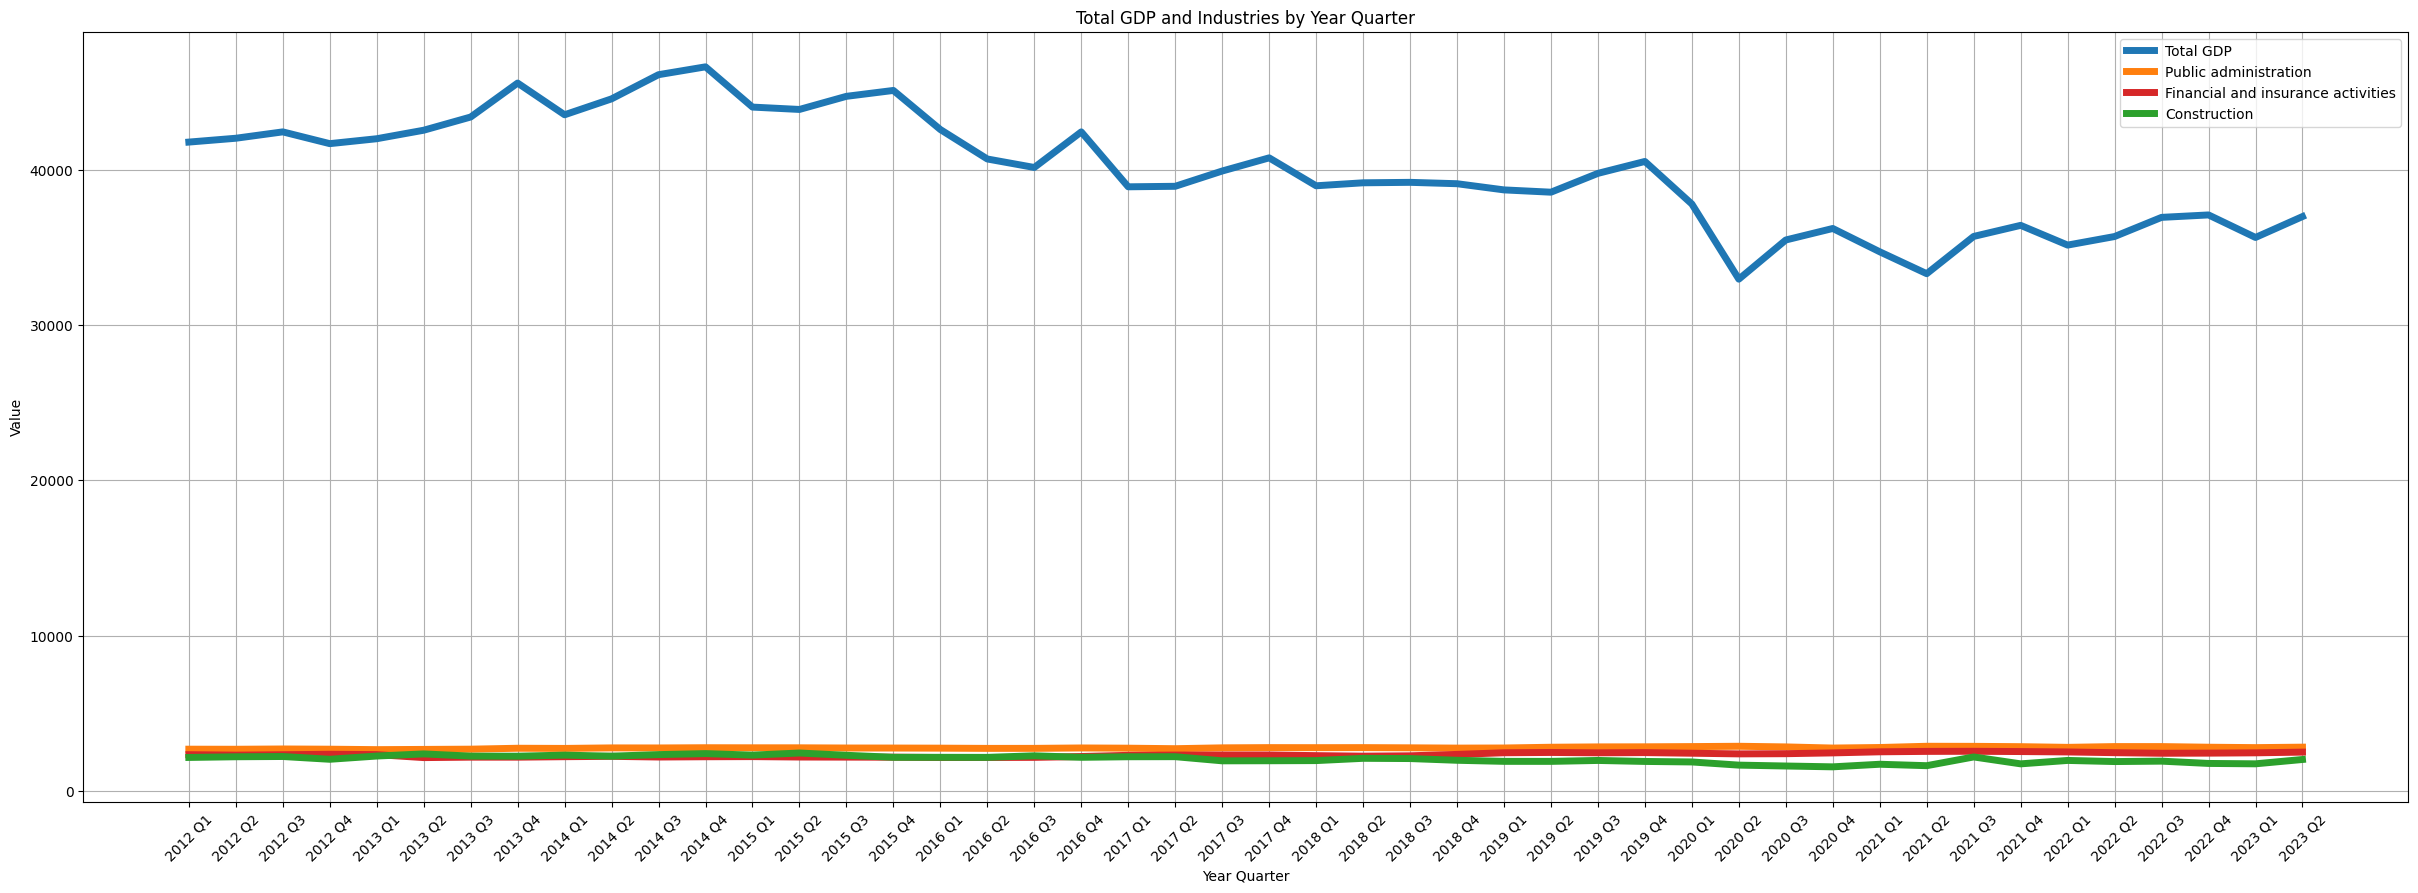

In [379]:
# Plotting using pandas plot function
ax = gdp_sml_in.plot(x='YearQuarter', y='Total GDP', kind='line', figsize=(30, 10), linewidth=5)
gdp_sml_in.plot(x='YearQuarter', y='Public administration', kind='line', ax=ax, color='tab:orange', linewidth=5)
gdp_sml_in.plot(x='YearQuarter', y='Financial and insurance activities', kind='line', ax=ax, color='tab:red', linewidth=5)
gdp_sml_in.plot(x='YearQuarter', y='Construction', kind='line', ax=ax, color='tab:green', linewidth=5)
ax.set_xlabel('Year Quarter')
ax.set_ylabel('Value')
ax.set_title('Total GDP and Industries by Year Quarter')

# Set x-axis tick frequency to show every tick (value)
tick_interval = 1  # Change this value as needed
plt.xticks(range(0, len(gdp_sml_in), tick_interval), gdp_sml_in['YearQuarter'][::tick_interval], rotation=45)
plt.grid(True)
plt.legend(['Total GDP', 'Public administration','Financial and insurance activities','Construction' ])
plt.show()

In [380]:
from sklearn.preprocessing import MinMaxScaler
# Assuming gdp_sml_in contains your DataFrame
data_to_normalize = gdp_sml_in.drop('YearQuarter', axis=1)  # Drop the 'YearQuarter' column (assuming it's similar to 'Date')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max normalization
normalized_data = scaler.fit_transform(data_to_normalize)

# Convert the normalized data back to a DataFrame
gdp_sml_in_nrml = pd.DataFrame(normalized_data, columns=data_to_normalize.columns)

# Add back the 'YearQuarter' column to the normalized DataFrame
gdp_sml_in_nrml['YearQuarter'] = gdp_sml_in['YearQuarter']

# Rearrange the columns to have 'YearQuarter' as the first column
gdp_sml_in_nrml = gdp_sml_in_nrml[['YearQuarter'] + list(data_to_normalize.columns)]

# Show the normalized DataFrame
print(gdp_sml_in_nrml)

   YearQuarter      Year   Quarter  Total GDP  Public administration  \
0      2012 Q1  0.000000  0.000000   0.645583               0.133456   
1      2012 Q2  0.000000  0.333333   0.663637               0.112287   
2      2012 Q3  0.000000  0.666667   0.693654               0.197423   
3      2012 Q4  0.000000  1.000000   0.638226               0.131155   
4      2013 Q1  0.090909  0.000000   0.661370               0.000000   
5      2013 Q2  0.090909  0.333333   0.701413               0.067648   
6      2013 Q3  0.090909  0.666667   0.763612               0.139439   
7      2013 Q4  0.090909  1.000000   0.923578               0.412333   
8      2014 Q1  0.181818  0.000000   0.774164               0.361712   
9      2014 Q2  0.181818  0.333333   0.849160               0.517257   
10     2014 Q3  0.181818  0.666667   0.963014               0.499770   
11     2014 Q4  0.181818  1.000000   1.000000               0.568339   
12     2015 Q1  0.272727  0.000000   0.810419               0.54

3 largest industries after the 3 major ones: Normalised data set to show comparison with gdp


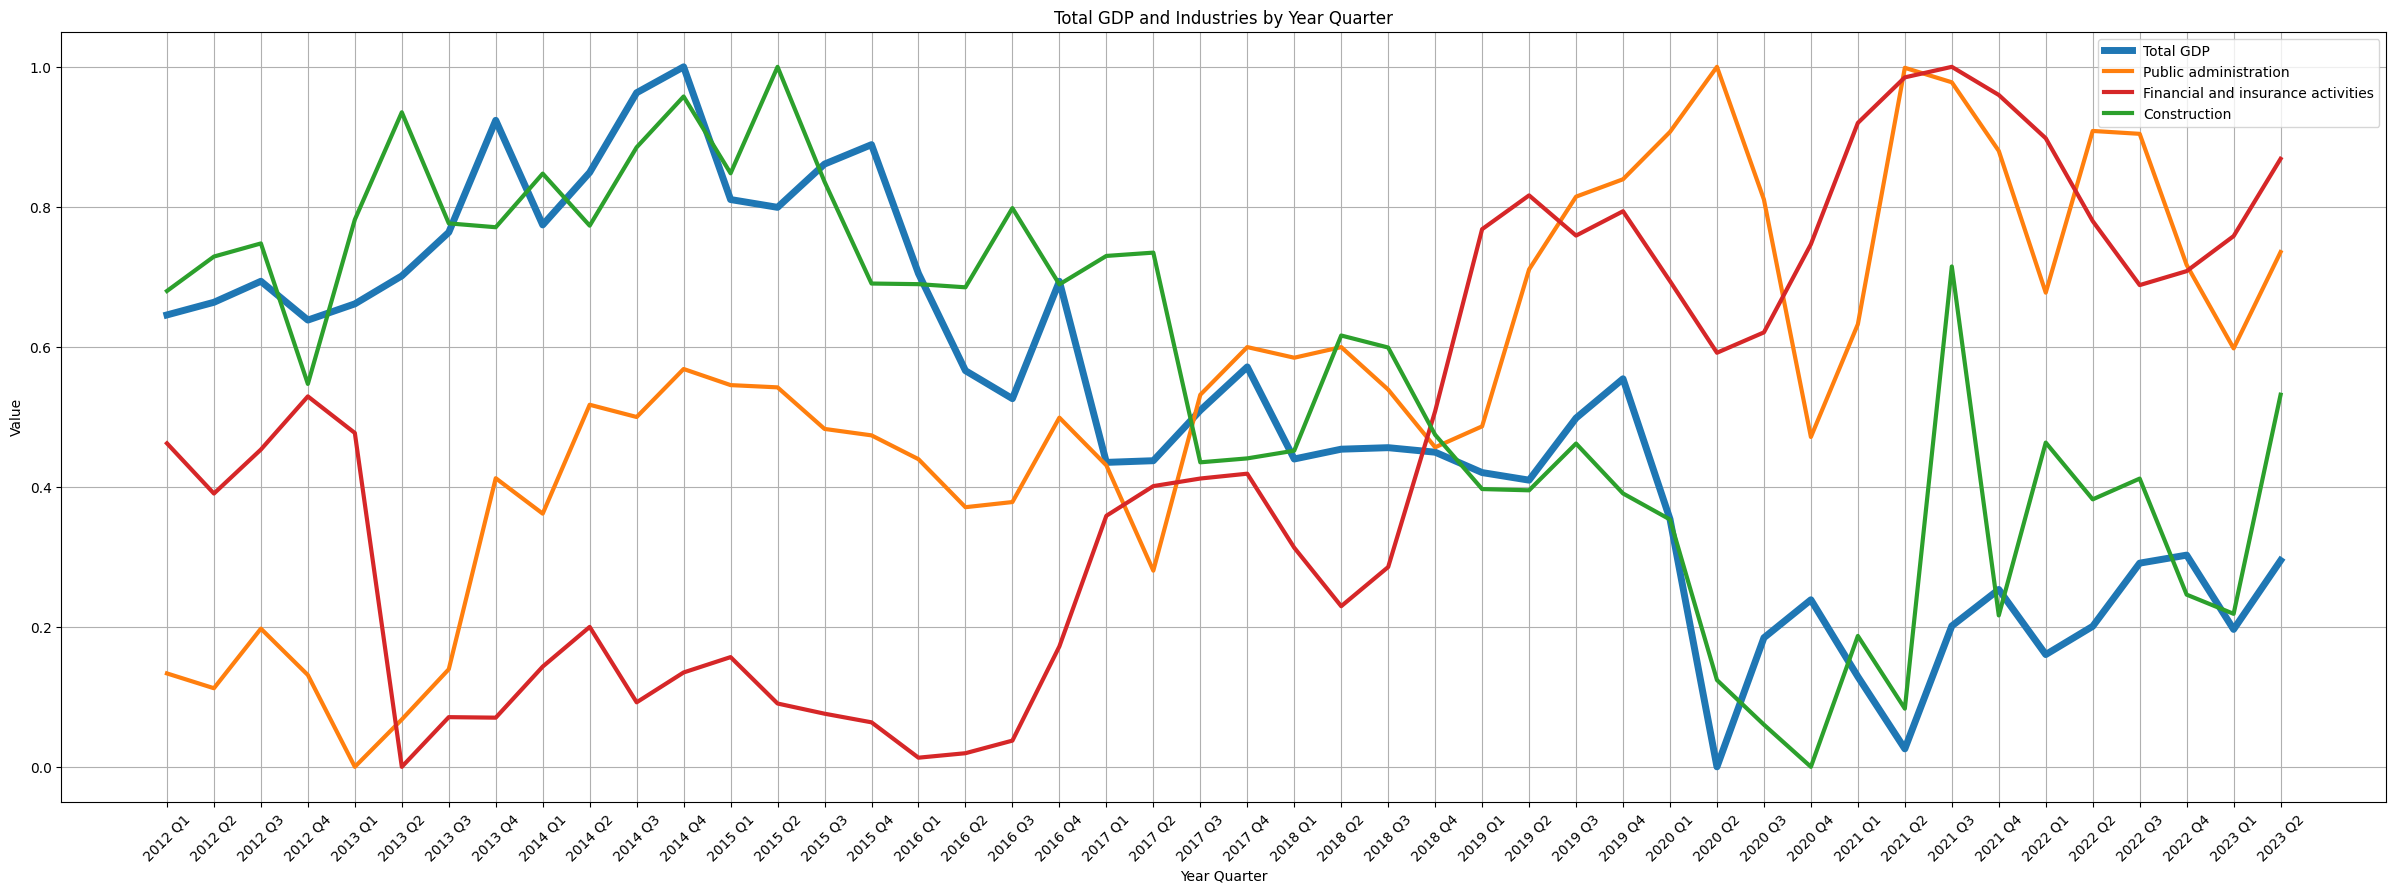

In [381]:
# Plotting using pandas plot function
ax = gdp_sml_in_nrml.plot(x='YearQuarter', y='Total GDP', kind='line', figsize=(30, 10), linewidth=5)
gdp_sml_in_nrml.plot(x='YearQuarter', y='Public administration', kind='line', ax=ax, color='tab:orange', linewidth=3)
gdp_sml_in_nrml.plot(x='YearQuarter', y='Financial and insurance activities', kind='line', ax=ax, color='tab:red', linewidth=3)
gdp_sml_in_nrml.plot(x='YearQuarter', y='Construction', kind='line', ax=ax, color='tab:green', linewidth=3)
ax.set_xlabel('Year Quarter')
ax.set_ylabel('Value')
ax.set_title('Total GDP and Industries by Year Quarter')

# Set x-axis tick frequency to show every tick (value)
tick_interval = 1  # Change this value as needed
plt.xticks(range(0, len(gdp_sml_in_nrml), tick_interval), gdp_sml_in_nrml['YearQuarter'][::tick_interval], rotation=45)
plt.grid(True)
plt.legend(['Total GDP', 'Public administration','Financial and insurance activities','Construction' ])
plt.show()

In [382]:
oil_gas_gdp_df = merged_df
oil_gas_gdp_df.head(2)

Date    Open_x    Open_y    Open_gas  Open_heating  \
48  2012-1  2.516226  3.159355  103.100484    118.364839   
49  2012-2  2.347825  2.901737   93.628571    109.126667   

    Agriculture, forestry and fishing  Mining and quarrying  Manufacturing  \
48                              289.5                9212.6         7888.0   
49                              282.1                8893.6         7847.7   

    Electricity and gas  Water supply and sewerage  ...  \
48               1309.3                      512.3  ...   
49               1299.3                      509.3  ...   

    Real estate activities  Professional, scientific and technical services  \
48                   753.3                                            604.0   
49                   754.7                                            544.2   

    Administrative and support services  Public administration  Education  \
48                                779.6                 2687.4      903.4   
49                                801.2                 2682.8      905.4   

    Human health and social work  Arts, entertainment and recreation  \
48                         147.4                                94.4   
49                         147.1                                94.1   

    Other service activities  Domestic services  Total GDP  
48                      80.5               39.8    41793.4  
49                      83.2               40.0    42040.3  

[2 rows x 26 columns]

In [383]:
oil_gas_gdp_df['Date'] = oil_gas_gdp_df['Date'].str.replace('-', ' Q')
oil_gas_gdp_df = oil_gas_gdp_df[['Date', 'Open_x', 'Open_y', 'Open_gas','Total GDP' ]].copy()
oil_gas_gdp_df.columns=['Date','Brent Oil','Crude Oil', 'Natural Gas','Total GDP']

oil_gas_gdp_df.head()

Date  Brent Oil  Crude Oil  Natural Gas  Total GDP
48  2012 Q1   2.516226   3.159355   103.100484    41793.4
49  2012 Q2   2.347825   2.901737    93.628571    42040.3
50  2012 Q3   2.892746   2.994471    92.081746    42450.8
51  2012 Q4   3.547281   3.056977    88.229844    41692.8
52  2013 Q1   3.473267   3.045040    94.274833    42009.3

In [384]:
from sklearn.preprocessing import MinMaxScaler

In [385]:
#normalized_df.head()

In [386]:
oil_gas_gdp_df.reset_index(drop=True, inplace=True)

In [387]:
# Assuming new_date_change contains the data you want to normalize
data_to_normalize = oil_gas_gdp_df.iloc[:, 1:]  # Select all columns except the first one (Date)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max normalization
normalized_data = scaler.fit_transform(data_to_normalize)

# Convert the normalized data back to a DataFrame
minMaxdf = pd.DataFrame(normalized_data, columns=data_to_normalize.columns)

# Combine the normalized data with the Date column from new_date_change
minMaxdf['Date'] = oil_gas_gdp_df['Date']

# Rearrange the columns to have Date as the first column
minMaxdf = minMaxdf[['Date'] + list(data_to_normalize.columns)]

In [388]:
minMaxdf.head()

Date  Brent Oil  Crude Oil  Natural Gas  Total GDP
0  2012 Q1   0.126988   0.727904     0.943551   0.645583
1  2012 Q2   0.098551   0.641789     0.823192   0.663637
2  2012 Q3   0.190569   0.672788     0.803537   0.693654
3  2012 Q4   0.301097   0.693682     0.754591   0.638226
4  2013 Q1   0.288598   0.689692     0.831404   0.661370

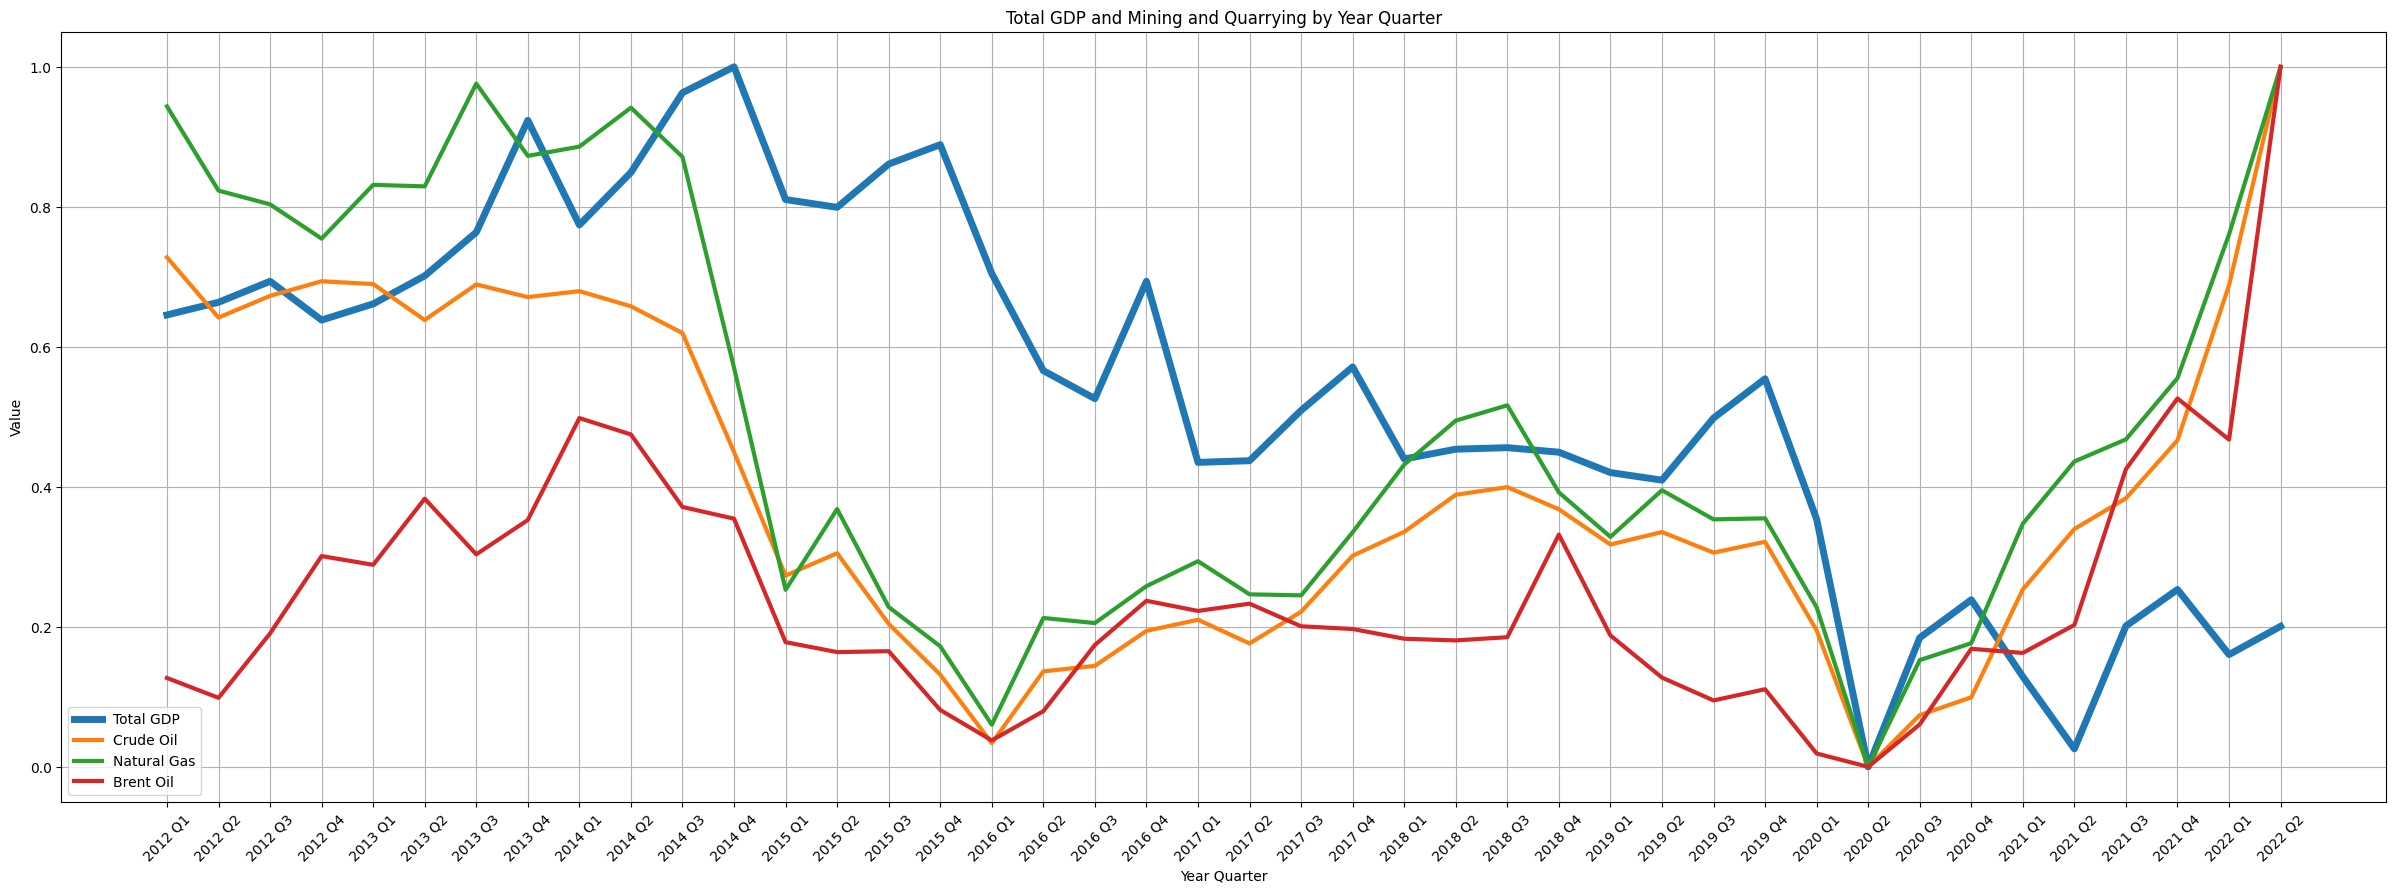

In [389]:
ax = minMaxdf.plot(x='Date', y='Total GDP', kind='line', figsize=(30, 10), linewidth=5)
minMaxdf.plot(x='Date', y='Crude Oil', kind='line', ax=ax, color='tab:orange', linewidth=3)
minMaxdf.plot(x='Date', y='Natural Gas', kind='line', ax=ax, color='tab:green', linewidth=3)
minMaxdf.plot(x='Date', y='Brent Oil', kind='line', ax=ax, color='tab:red', linewidth=3)
ax.set_xlabel('Year Quarter')
ax.set_ylabel('Value')
ax.set_title('Total GDP and Mining and Quarrying by Year Quarter')

# Set x-axis tick frequency to show every tick (value)
tick_interval = 1  # Change this value as needed
plt.xticks(range(0, len(minMaxdf), tick_interval), minMaxdf['Date'][::tick_interval], rotation=45)
plt.grid(True)
plt.legend(['Total GDP', 'Crude Oil', 'Natural Gas', 'Brent Oil'])
plt.show()

In [390]:
import numpy as np

Test = oil_gas_gdp_df
# Assuming new_date_change contains the data you want to normalize
numerical_columns = ['Brent Oil', 'Crude Oil', 'Natural Gas', 'Total GDP']
Test[numerical_columns] = np.log1p(oil_gas_gdp_df[numerical_columns])

In [391]:
Test.head()

Date  Brent Oil  Crude Oil  Natural Gas  Total GDP
0  2012 Q1   1.257388   1.425360     4.645357  10.640518
1  2012 Q2   1.208311   1.361422     4.549959  10.646408
2  2012 Q3   1.359115   1.384911     4.533478  10.656125
3  2012 Q4   1.514530   1.400438     4.491216  10.638108
4  2013 Q1   1.498119   1.397491     4.556766  10.645670

In [392]:
from sklearn.preprocessing import StandardScaler
Zscore_nrml = oil_gas_gdp_df
# Assuming new_date_change contains the data you want to normalize
numerical_columns = ['Brent Oil', 'Crude Oil', 'Natural Gas', 'Total GDP']
scaler = StandardScaler()
Zscore_nrml[numerical_columns] = scaler.fit_transform(oil_gas_gdp_df[numerical_columns])


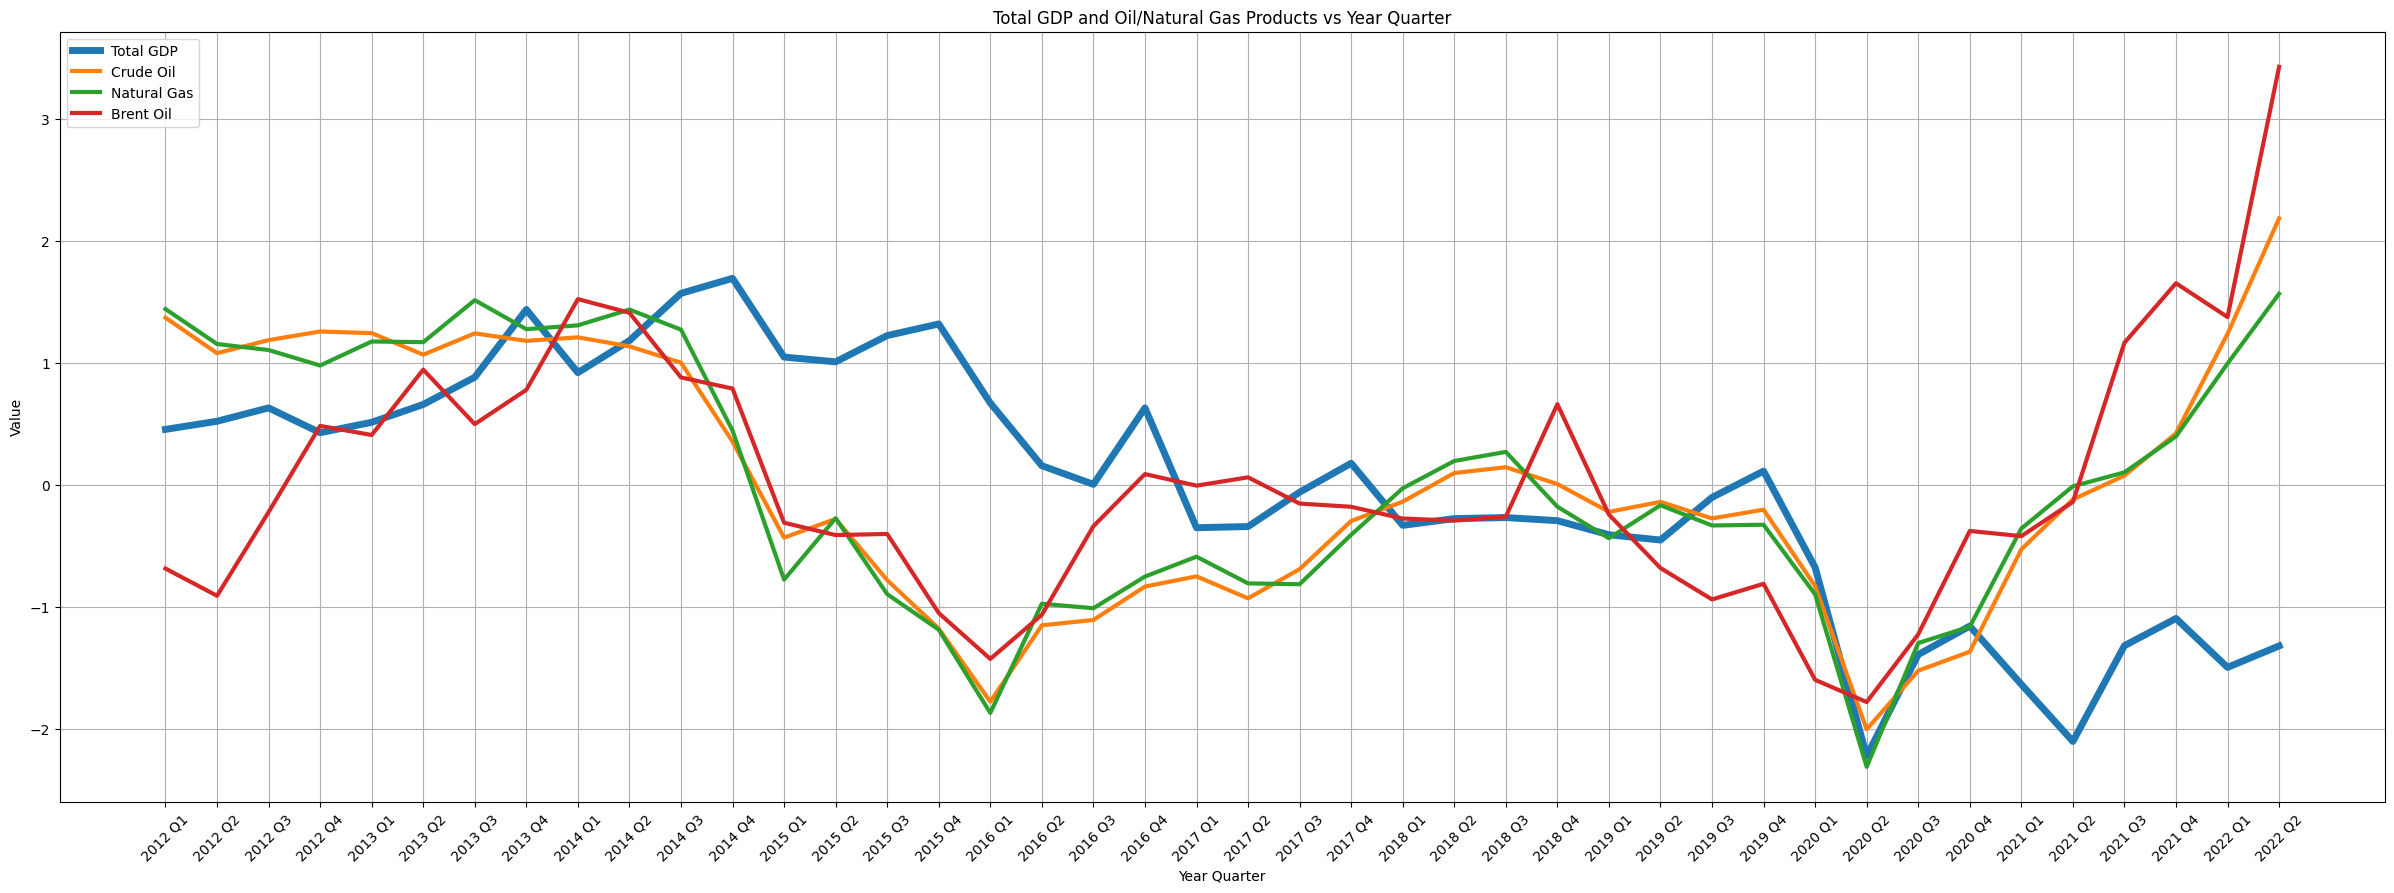

In [393]:
ax = Zscore_nrml.plot(x='Date', y='Total GDP', kind='line', figsize=(30, 10), linewidth=5)
Zscore_nrml.plot(x='Date', y='Crude Oil', kind='line', ax=ax, color='tab:orange', linewidth=3)
Zscore_nrml.plot(x='Date', y='Natural Gas', kind='line', ax=ax, color='tab:green', linewidth=3)
Zscore_nrml.plot(x='Date', y='Brent Oil', kind='line', ax=ax, color='tab:red', linewidth=3)
ax.set_xlabel('Year Quarter')
ax.set_ylabel('Value')
ax.set_title('Total GDP and Oil/Natural Gas Products vs Year Quarter')

# Set x-axis tick frequency to show every tick (value)
tick_interval = 1  # Change this value as needed
plt.xticks(range(0, len(Zscore_nrml), tick_interval), Zscore_nrml['Date'][::tick_interval], rotation=45)
plt.grid(True)
plt.legend(['Total GDP', 'Crude Oil', 'Natural Gas', 'Brent Oil'])
plt.show()

###Cleaning Data for Small Caribbean Economies as stated by The World Bank



In [394]:
caribbean_df=pd.read_csv("small_economy_gdp.csv")
caribbean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    15 non-null     object 
 1   Series Code    13 non-null     object 
 2   Country Name   13 non-null     object 
 3   Country Code   13 non-null     object 
 4   2000 [YR2000]  13 non-null     float64
 5   2001 [YR2001]  13 non-null     float64
 6   2002 [YR2002]  13 non-null     float64
 7   2003 [YR2003]  13 non-null     float64
 8   2004 [YR2004]  13 non-null     float64
 9   2005 [YR2005]  13 non-null     float64
 10  2006 [YR2006]  13 non-null     float64
 11  2007 [YR2007]  13 non-null     float64
 12  2008 [YR2008]  13 non-null     float64
 13  2009 [YR2009]  13 non-null     float64
 14  2010 [YR2010]  13 non-null     float64
 15  2011 [YR2011]  13 non-null     float64
 16  2012 [YR2012]  13 non-null     float64
 17  2013 [YR2013]  13 non-null     float64
 18  2014 [YR2014

In [395]:
##transposing table
##extracing column names, parsing them and taking out the years alone, changing them into date/time format
countries=[]
dummy_data=caribbean_df.T
dummy_data.reset_index(inplace=True)
years=dummy_data.iloc[2:]
countries=years.iloc[0]
years



index                    0             1                    2  \
2    Country Name  Trinidad and Tobago      Suriname  St. Kitts and Nevis   
3    Country Code                  TTO           SUR                  KNA   
4   2000 [YR2000]         13821.254324   7497.480531         15183.077404   
5   2001 [YR2001]         14651.770874   7850.773452         16154.196129   
6   2002 [YR2002]          15972.84861    8059.59138         16530.419548   
7   2003 [YR2003]         18535.807526   8595.719644         16135.380473   
8   2004 [YR2004]         20431.465727   9449.316872         17175.538034   
9   2005 [YR2005]         22251.326127  10072.758343         19377.895547   
10  2006 [YR2006]         25819.630345  10863.022985         20539.632715   
11  2007 [YR2007]         27618.802252  11595.304123         21157.773196   
12  2008 [YR2008]          28937.28429  12169.232953          23902.37003   
13  2009 [YR2009]         27677.084311  12474.997313          23178.76256   
14  2010 [YR2010]         28753.687923  13129.334642         23409.716183   
15  2011 [YR2011]         29064.312372    14030.2129         24191.569012   
16  2012 [YR2012]         29988.934592  15308.156935         23159.654358   
17  2013 [YR2013]         29737.173018   16318.60062         24317.380624   
18  2014 [YR2014]         29992.865326  16764.042707         26463.259733   
19  2015 [YR2015]         27840.787657  16721.295933         26570.793612   
20  2016 [YR2016]         26218.461197  14633.192587         27932.001367   
21  2017 [YR2017]         26481.072969  17753.060265         29317.593466   
22  2018 [YR2018]         26486.753398  18881.615383         30654.111715   
23  2019 [YR2019]         26787.887466  19231.421594         32500.971762   
24  2020 [YR2020]         24703.321507  16187.630964         28172.681581   
25  2021 [YR2021]         25419.545917  16343.584328         29198.029443   
26  2022 [YR2022]         27515.526422  17773.483956         33981.839595   

               3                               4             5             6  \
2      St. Lucia  St. Vincent and the Grenadines       Jamaica        Guyana   
3            LCA                             VCT           JAM           GUY   
4     9260.97146                     6486.787936   6451.899649   5903.819779   
5    9084.575634                      6759.10586   6652.370572   6168.281133   
6    9195.585891                     7243.330309   6857.452873   6331.085303   
7    9702.130324                     7904.353819   7214.214656   6413.202937   
8   10609.035877                      8488.03186   7469.314226   6689.525608   
9   10821.249567                     9017.298375   7735.114232   6771.061588   
10   11769.09937                    10000.920248   8165.919733   7351.019766   
11  12214.734106                    10670.249733   8470.290267   8112.345461   
12  12983.147657                    10969.183278   8530.609009    8439.50566   
13  12613.525199                    10934.526361   8178.963348   8834.223432   
14  12713.809723                    10622.687452   8122.350005   9351.787923   
15  13444.346796                    10837.639892   8396.881317  10092.082486   
16  13288.769754                    11052.908566   8431.375117  10640.672561   
17  13725.185119                    11694.775486    8703.54096   11198.16014   
18  13989.281918                    12199.733123    8823.10864  11130.494472   
19  13815.499797                    12425.493236   9095.919824  11382.242376   
20  14584.526938                    13530.490638   9533.834148  11479.462007   
21  15247.463029                    13575.416488   9984.577117   12193.62168   
22  15998.355031                      14379.7556  10405.033973  12671.690773   
23  16116.508298                    14784.714082   10678.84167  13364.235656   
24  12303.796896                    14457.778917   9721.970142  19462.967864   
25  14395.677626                    15271.270278  10598.927021  24193.566469   
26  17835

In [396]:
##parsing years removing [yr%y]
new_years=[]

for index,row  in years.iterrows():
  if index>=4:
    temp=row["index"].split(" ")##splitting up the [yr%y]
    years.loc[index,"index"]=int(temp[0]);

# years.columns=["year","Country","Country Code"]


In [397]:
years=years.T
years


2             3             4   \
index                    Country Name  Country Code          2000   
0                 Trinidad and Tobago           TTO  13821.254324   
1                            Suriname           SUR   7497.480531   
2                 St. Kitts and Nevis           KNA  15183.077404   
3                           St. Lucia           LCA    9260.97146   
4      St. Vincent and the Grenadines           VCT   6486.787936   
5                             Jamaica           JAM   6451.899649   
6                              Guyana           GUY   5903.819779   
7                             Grenada           GRD   7306.115958   
8                            Dominica           DMA   6633.073409   
9                              Belize           BLZ   7524.977561   
10                           Barbados           BRB  13022.784149   
11                       Bahamas, The           BHS  25732.996501   
12                Antigua and Barbuda           ATG   19189.44832   
13                                NaN           NaN           NaN   
14                                NaN           NaN           NaN   
15                                NaN           NaN           NaN   
16                                NaN           NaN           NaN   
17                                NaN           NaN           NaN   

                 5             6             7             8             9   \
index          2001          2002          2003          2004          2005   
0      14651.770874   15972.84861  18535.807526  20431.465727  22251.326127   
1       7850.773452    8059.59138   8595.719644   9449.316872  10072.758343   
2      16154.196129  16530.419548  16135.380473  17175.538034  19377.895547   
3       9084.575634   9195.585891   9702.130324  10609.035877  10821.249567   
4        6759.10586   7243.330309   7904.353819    8488.03186   9017.298375   
5       6652.370572   6857.452873   7214.214656   7469.314226   7735.114232   
6       6168.281133   6331.085303   6413.202937   6689.525608   6771.061588   
7       7285.341369   7632.349357   8479.681512   8589.637125   9967.958141   
8       6797.378005   6697.380133   7244.348252   7650.995342   7931.104883   
9         7828.2066   8121.277157   8806.397609   9192.028333   9405.616622   
10     12965.917958  13217.987476  13718.337586   14231.91706   15203.75684   
11     26625.898315  27408.449996  27229.956415  27829.524845  29274.645694   
12     18444.315299  18683.988396  19982.686584  21464.365426  23296.724027   
13              NaN           NaN           NaN           NaN           NaN   
14              NaN           NaN           NaN           NaN           NaN   
15              NaN           NaN           NaN           NaN           NaN   
16              NaN           NaN           NaN           NaN           NaN   
17              NaN           NaN           NaN           NaN           NaN   

                 10            11  ...            17            18  \
index          2006          2007  ...          2013          2014   
0      25819.630345  27618.802252  ...  29737.173018  29992.865326   
1      10863.022985  11595.304123  ...   16318.60062  16764.042707   
2      20539.632715  21157.773196  ...  24317.380624  26463.259733   
3       11769.09937  12214.734106  ...  13725.185119  13989.281918   
4      10000.920248  10670.249733  ...  11694.775486  12199.733123   
5       8165.919733   8470.290267  ...    8703.54096    8823.10864   
6       7351.019766   8112.345461  ...   11198.16014  11130.494472   
7       9799.746305  10610.430055  ...  10995.569255  12039.112046   
8       8548.310247   9332.598888  ...  10470.263274  11184.641954   
9       9840.065279   10142.56911  ...   9278.691134    9191.04276   
10     16562.125092  17298.199569  ...   15775.08686   15613.28135   
11     30511.052085  31344.196235  ...   29911.91684  31255.387707   
12     26724.197298   29593.08035  ...  21806.392019  21788.640103   
13              NaN    

In [398]:

years.columns=years.iloc[0]
years=years.iloc[1:]


In [399]:
years=pd.melt(years,id_vars=["Country Name","Country Code"])
years.columns=["Country Name","Country Code","Year","GDP"]

###Dropping nan Values

In [400]:
years=years.dropna()
years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 408
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  299 non-null    object
 1   Country Code  299 non-null    object
 2   Year          299 non-null    object
 3   GDP           299 non-null    object
dtypes: object(4)
memory usage: 11.7+ KB


In [401]:
##changing to the necessary values

clean_economies = years.astype({'Country Name': str, 'Country Code': str,'Year': int,'GDP':float})


clean_economies




Country Name Country Code  Year           GDP
0               Trinidad and Tobago          TTO  2000  13821.254324
1                          Suriname          SUR  2000   7497.480531
2               St. Kitts and Nevis          KNA  2000  15183.077404
3                         St. Lucia          LCA  2000   9260.971460
4    St. Vincent and the Grenadines          VCT  2000   6486.787936
..                              ...          ...   ...           ...
404                        Dominica          DMA  2022  13540.224615
405                          Belize          BLZ  2022  11189.864082
406                        Barbados          BRB  2022  18210.134301
407                    Bahamas, The          BHS  2022  40942.776724
408             Antigua and Barbuda          ATG  2022  26365.468976

[299 rows x 4 columns]

##Calculating Economic Growth from 2012 to 2022 for all the economies

In [402]:
countries=countries.dropna()
countries=countries.tolist()

In [403]:
# finding economic growth within countries for the past 10 years by, doing [(GDP at Time 2 - GDP at Time 1) / GDP at Time × 100

gdp_growth=[]
values2012=[]
values2022=[]

for index,rows in clean_economies.iterrows():
  if rows["Year"]==2012:
    values2012.append(rows["GDP"])
    # print(rows["GDP"])
  if rows["Year"]==2022:

    values2022.append(rows["GDP"])


for x in range(0,13):
  rate=((values2022[x]-values2012[x])/(values2022[x]));
  gdp_growth.append(rate);



growth={"Country Name":countries[1:],"Growth":gdp_growth};
growth=pd.DataFrame(growth)
growth


Country Name    Growth
0              Trinidad and Tobago -0.089891
1                         Suriname  0.138708
2              St. Kitts and Nevis  0.318470
3                        St. Lucia  0.254934
4   St. Vincent and the Grenadines  0.357853
5                          Jamaica  0.293790
6                           Guyana  0.747192
7                          Grenada  0.394189
8                         Dominica  0.243355
9                           Belize  0.187056
10                        Barbados  0.135699
11                    Bahamas, The  0.249607
12             Antigua and Barbuda  0.152282

##Bar Chart of Countries with highest economic growth excluding Trinidad and Tobago

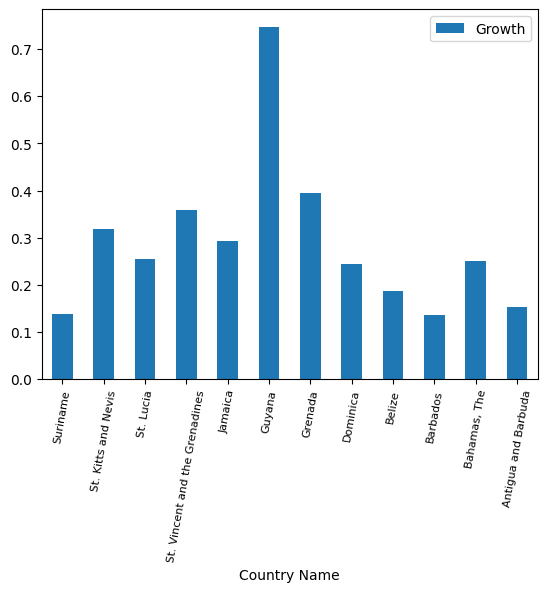

In [404]:
ax = growth[1:].plot.bar(x='Country Name', y='Growth', rot=80)

# Adjust font size of x-axis labels
ax.tick_params(axis='x', labelsize=8)  # Change 8 to the desired font size

plt.show()


##Guyana's Economic Activity

In [30]:
guyana_df=pd.read_csv("Guyana.csv")
guyana_df

Gross Domestic Product by Economic Activity  \
0                 Constant 2012 prices (G$ Millions)   
1                               GDP at market prices   
2                  Agriculture, forestry and fishing   
3                              Growing of Sugar Cane   
4                                    Growing of Rice   
5                             Growing of Other crops   
6                               Raising of Livestock   
7                                           Forestry   
8                                            Fishing   
9                               Mining and quarrying   
10                                           Bauxite   
11                                              Gold   
12                     Other mining and\n  quarrying   
13        Petroleum and gas; and\n  support services   
14                                     Manufacturing   
15                                             Sugar   
16                                              Rice   
17                               Other manufacturing   
18                                Electricity supply   
19                         Water supply and sewerage   
20                                      Construction   
21            Wholesale and retail trade and repairs   
22                             Transport and storage   
23                   Accommodation and food services   
24                     Information and communication   
25                Financial and insurance activities   
26    Financial intermediation\n  and other services   
27                  Insurance services and\n  agents   
28                            Real estate activities   
29   Professional, scientific and technical services   
30               Administrative and support services   
31                             Public administration   
32                                         Education   
33                      Human health and social work   
34                Arts, entertainment and recreation   
35                          Other service activities   
36                                        Less FISIM   
37                               GDP at basic prices   
38                  Taxes less subsidies on products   
39                           GDP at purchaser prices   
40                      Source: Bureau of Statistics   

   Gross Domestic Product by Economic Activity.1  \
0             Constant 2012 prices (G$ Millions)   
1                                           2006   
2                                       195,947    
3                                        15,975    
4                                        30,318    
5                                        84,059    
6                                        14,945    
7                                        21,648    
8                                        11,465    
9                                        70,190    
10                                        9,530    
11                                       38,681    
12                                       12,362    
13                                                 
14                                       46,160    
15                                       14,173    
16                                        7,201    
17                                       24,786    
18                                        3,023    
19                                        1,990    
20                                       56,793    
21                                       53,086    
22                                       18,241    
23                                        1,854    
24                                       11,223    
25                                       19,720    
26                                       17,535    
27                                        2,185    
28                                       60,615    
29                                        2,417    
30                                       30,

##Need to transpose tables, make year its own column, change null values into 0

In [59]:
temp=guyana_df[1:]##removing the first column of the original dataset
# taking out the column headers
temp.columns=temp.iloc[0]##changing the column names to the first row of the dataset

In [60]:
temp=temp[1:]

# removing the last row since it is empty
temp=temp.drop(40)
temp

1                               GDP at market prices                2006  \
2                  Agriculture, forestry and fishing            195,947    
3                              Growing of Sugar Cane             15,975    
4                                    Growing of Rice             30,318    
5                             Growing of Other crops             84,059    
6                               Raising of Livestock             14,945    
7                                           Forestry             21,648    
8                                            Fishing             11,465    
9                               Mining and quarrying             70,190    
10                                           Bauxite              9,530    
11                                              Gold             38,681    
12                     Other mining and\n  quarrying             12,362    
13        Petroleum and gas; and\n  support services                       
14                                     Manufacturing             46,160    
15                                             Sugar             14,173    
16                                              Rice              7,201    
17                               Other manufacturing             24,786    
18                                Electricity supply              3,023    
19                         Water supply and sewerage              1,990    
20                                      Construction             56,793    
21            Wholesale and retail trade and repairs             53,086    
22                             Transport and storage             18,241    
23                   Accommodation and food services              1,854    
24                     Information and communication             11,223    
25                Financial and insurance activities             19,720    
26    Financial intermediation\n  and other services             17,535    
27                  Insurance services and\n  agents              2,185    
28                            Real estate activities             60,615    
29   Professional, scientific and technical services              2,417    
30               Administrative and support services             30,452    
31                             Public administration             29,818    
32                                         Education             14,775    
33                      Human health and social work              4,525    
34                Arts, entertainment and recreation              1,856    
35                          Other service activities              1,675    
36                                        Less FISIM              7,988    
37                               GDP at basic prices            593,541    
38                  Taxes less subsidies on products             43,522    
39                           GDP at purchaser prices            637,063    

1                2007                  2008                 2009  \
2            196,128               191,371              196,246    
3             16,054                13,925               14,384    
4             29,436                32,543               35,495    
5             86,505                91,410               92,656    
6             15,124                16,435               18,300    
7             20,409                17,635               18,098    
8             11,882                11,662               10,596    
9             80,518                79,058               76,292    
10            14,233                13,676                9,228    
11            44,760                49,103               56,315    
12            11,541                 9,025                7,279    
13                                                                 
14            48,785                44,668               46,444    
15            15,690                12,354               12,762    
16             

In [61]:
temp=temp.T
##removing the indexes
temp.reset_index(inplace=True)
print(temp.columns)


RangeIndex(start=1, stop=40, step=1)


In [62]:
temp

1                                  2   \
0   GDP at market prices  Agriculture, forestry and fishing   
1                   2006                           195,947    
2                   2007                           196,128    
3                   2008                           191,371    
4                   2009                           196,246    
5                   2010                           198,283    
6                   2011                           203,835    
7                   2012                           211,234    
8                   2013                           219,803    
9                   2014                           236,671    
10                  2015                           244,364    
11                  2016                           217,221    
12                  2017                           244,734    
13                  2018                           260,963    
14                  2019                           259,670    
15                  2020                           270,445    
16                  2021                           245,915    
17                  2022                           274,666    

                         3                   4                         5   \
0     Growing of Sugar Cane     Growing of Rice    Growing of Other crops   
1                   15,975              30,318                    84,059    
2                   16,054              29,436                    86,505    
3                   13,925              32,543                    91,410    
4                   14,384              35,495                    92,656    
5                   13,592              35,650                    94,974    
6                   14,554              39,576                   100,371    
7                   13,420              41,562                   105,691    
8                   11,494              46,142                   110,618    
9                   13,304              54,935                   116,262    
10                  14,220              60,677                   118,709    
11                  11,292              48,432                   111,795    
12                   8,450              55,525                   133,986    
13                   6,440              54,352                   149,136    
14                   5,677              54,901                   149,522    
15                   5,469              57,532                   159,461    
16                   3,571              45,710                   143,823    
17                   2,895              49,408                   165,786    

                        6                   7                   8   \
0     Raising of Livestock            Forestry             Fishing   
1                  14,945              21,648              11,465    
2                  15,124              20,409              11,882    
3                  16,435              17,635              11,662    
4                  18,300              18,098              10,596    
5                  16,986              20,225              11,294    
6                  17,970              18,351              10,811    
7                  20,564              17,554              12,444    
8                  21,236              18,517              11,796    
9                  21,832              21,473               8,865    
10                 23,028              19,060               8,670    
11                 21,697              14,040               9,965    
12                 21,196              15,224              10,353    
13                 26,127              15,430               9,478    
14                 25,201              14,821               9,548    
15                 26,455              13,614               7,914    
16                 28,880              15,149               8,782    
17                 30,868              17,076               8,633    

                      9      

In [63]:
years=temp[1]
years=pd.DataFrame(years)
years.columns=["Year"]
years=years[1:]
years.T

1     2     3     4     5     6     7     8     9     10    11    12  \
Year  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017   

        13    14    15    16    17  
Year  2018  2019  2020  2021  2022

In [64]:
temp=temp.drop([1],axis=1)
temp.T
temp.columns=temp.iloc[0]

In [65]:
temp
temp["Year"]=years
temp.T
temp = temp.drop(temp.columns[0], axis=1)


In [66]:
clean_gdf=temp[1:]
clean_gdf = clean_gdf.drop('GDP at purchaser prices', axis=1)


In [67]:
clean_gdf.columns

Index(['  Growing of Sugar Cane', '  Growing of Rice',
       '  Growing of Other crops', '  Raising of Livestock', '  Forestry',
       '  Fishing', 'Mining and quarrying', '  Bauxite', '  Gold',
       '  Other mining and\n  quarrying',
       '  Petroleum and gas; and\n  support services', 'Manufacturing',
       '  Sugar', '  Rice', '  Other manufacturing', 'Electricity supply',
       'Water supply and sewerage', 'Construction',
       'Wholesale and retail trade and repairs', 'Transport and storage',
       'Accommodation and food services', 'Information and communication',
       'Financial and insurance activities',
       '  Financial intermediation\n  and other services',
       '  Insurance services and\n  agents', 'Real estate activities',
       'Professional, scientific and technical services',
       'Administrative and support services', 'Public administration',
       'Education', 'Human health and social work',
       'Arts, entertainment and recreation', 'Other servi

In [68]:
##removing columns that are not industries
clean_gdf = clean_gdf.drop('  Taxes less subsidies on products', axis=1)
clean_gdf = clean_gdf.drop('GDP at basic prices', axis=1)
clean_gdf = clean_gdf.drop('Less FISIM', axis=1)


In [75]:
clean_gdf

0    Growing of Sugar Cane     Growing of Rice   Growing of Other crops  \
1                  15,975              30,318                   84,059    
2                  16,054              29,436                   86,505    
3                  13,925              32,543                   91,410    
4                  14,384              35,495                   92,656    
5                  13,592              35,650                   94,974    
6                  14,554              39,576                  100,371    
7                  13,420              41,562                  105,691    
8                  11,494              46,142                  110,618    
9                  13,304              54,935                  116,262    
10                 14,220              60,677                  118,709    
11                 11,292              48,432                  111,795    
12                  8,450              55,525                  133,986    
13                  6,440              54,352                  149,136    
14                  5,677              54,901                  149,522    
15                  5,469              57,532                  159,461    
16                  3,571              45,710                  143,823    
17                  2,895              49,408                  165,786    

0    Raising of Livestock            Forestry             Fishing  \
1                 14,945              21,648              11,465    
2                 15,124              20,409              11,882    
3                 16,435              17,635              11,662    
4                 18,300              18,098              10,596    
5                 16,986              20,225              11,294    
6                 17,970              18,351              10,811    
7                 20,564              17,554              12,444    
8                 21,236              18,517              11,796    
9                 21,832              21,473               8,865    
10                23,028              19,060               8,670    
11                21,697              14,040               9,965    
12                21,196              15,224              10,353    
13                26,127              15,430               9,478    
14                25,201              14,821               9,548    
15                26,455              13,614               7,914    
16                28,880              15,149               8,782    
17                30,868              17,076               8,633    

0  Mining and quarrying             Bauxite                Gold  \
1               70,190               9,530              38,681    
2               80,518              14,233              44,760    
3               79,058              13,676              49,103    
4               76,292               9,228              56,315    
5               73,856               8,345              57,934    
6               85,938              11,520              68,199    
7              100,988              12,965              82,392    
8              109,494              12,159              90,363    
9               93,781              11,303              72,786    
10             104,567               8,841              84,723    
11             157,978               9,391             133,869    
12             146,388               9,677             122,796    
13             151,122              11,582             115,746    
14             167,155              11,784             119,255    
15             674,849               6,925             109,963    
16             923,069               6,721              93,738    
17           1,956,413               8,212              91,364    

0    Other mining and\n  quarrying  ...   Insurance services and\n  agents  \
1                          12,362   ...                             2,185    
2                          11,541   ...    

In [79]:
print(clean_gdf.columns)


Index(['  Growing of Sugar Cane', '  Growing of Rice',
       '  Growing of Other crops', '  Raising of Livestock', '  Forestry',
       '  Fishing', 'Mining and quarrying', '  Bauxite', '  Gold',
       '  Other mining and\n  quarrying',
       '  Petroleum and gas; and\n  support services', 'Manufacturing',
       '  Sugar', '  Rice', '  Other manufacturing', 'Electricity supply',
       'Water supply and sewerage', 'Construction',
       'Wholesale and retail trade and repairs', 'Transport and storage',
       'Accommodation and food services', 'Information and communication',
       'Financial and insurance activities',
       '  Financial intermediation\n  and other services',
       '  Insurance services and\n  agents', 'Real estate activities',
       'Professional, scientific and technical services',
       'Administrative and support services', 'Public administration',
       'Education', 'Human health and social work',
       'Arts, entertainment and recreation', 'Other servi

In [96]:

clean_gdf.fillna(0, inplace=True)



In [97]:
clean_gdf

0    Growing of Sugar Cane     Growing of Rice   Growing of Other crops  \
1                  15,975              30,318                   84,059    
2                  16,054              29,436                   86,505    
3                  13,925              32,543                   91,410    
4                  14,384              35,495                   92,656    
5                  13,592              35,650                   94,974    
6                  14,554              39,576                  100,371    
7                  13,420              41,562                  105,691    
8                  11,494              46,142                  110,618    
9                  13,304              54,935                  116,262    
10                 14,220              60,677                  118,709    
11                 11,292              48,432                  111,795    
12                  8,450              55,525                  133,986    
13                  6,440              54,352                  149,136    
14                  5,677              54,901                  149,522    
15                  5,469              57,532                  159,461    
16                  3,571              45,710                  143,823    
17                  2,895              49,408                  165,786    

0    Raising of Livestock            Forestry             Fishing  \
1                 14,945              21,648              11,465    
2                 15,124              20,409              11,882    
3                 16,435              17,635              11,662    
4                 18,300              18,098              10,596    
5                 16,986              20,225              11,294    
6                 17,970              18,351              10,811    
7                 20,564              17,554              12,444    
8                 21,236              18,517              11,796    
9                 21,832              21,473               8,865    
10                23,028              19,060               8,670    
11                21,697              14,040               9,965    
12                21,196              15,224              10,353    
13                26,127              15,430               9,478    
14                25,201              14,821               9,548    
15                26,455              13,614               7,914    
16                28,880              15,149               8,782    
17                30,868              17,076               8,633    

0  Mining and quarrying             Bauxite                Gold  \
1               70,190               9,530              38,681    
2               80,518              14,233              44,760    
3               79,058              13,676              49,103    
4               76,292               9,228              56,315    
5               73,856               8,345              57,934    
6               85,938              11,520              68,199    
7              100,988              12,965              82,392    
8              109,494              12,159              90,363    
9               93,781              11,303              72,786    
10             104,567               8,841              84,723    
11             157,978               9,391             133,869    
12             146,388               9,677             122,796    
13             151,122              11,582             115,746    
14             167,155              11,784             119,255    
15             674,849               6,925             109,963    
16             923,069               6,721              93,738    
17           1,956,413               8,212              91,364    

0    Other mining and\n  quarrying  ...   Insurance services and\n  agents  \
1                          12,362   ...                             2,185    
2                          11,541   ...    

In [102]:
def clean_column(value):
    try:
        return int(value.replace(',', ''))
    except ValueError:
        return None


for column in clean_gdf:
    try:
        clean_gdf[column].astype(int)
    except ValueError:
        # clean_column(column)
        # print(f"Column '{column}' contains non-integer values.")
        clean_gdf[column] = clean_gdf[column].apply(clean_column)

In [131]:
clean_gdf.head(5)

0    Growing of Sugar Cane    Growing of Rice    Growing of Other crops  \
1                    15975              30318                     84059   
2                    16054              29436                     86505   
3                    13925              32543                     91410   
4                    14384              35495                     92656   
5                    13592              35650                     94974   

0    Raising of Livestock    Forestry    Fishing  Mining and quarrying  \
1                   14945       21648      11465                 70190   
2                   15124       20409      11882                 80518   
3                   16435       17635      11662                 79058   
4                   18300       18098      10596                 76292   
5                   16986       20225      11294                 73856   

0    Bauxite    Gold    Other mining and\n  quarrying  ...  \
1       9530   38681                            12362  ...   
2      14233   44760                            11541  ...   
3      13676   49103                             9025  ...   
4       9228   56315                             7279  ...   
5       8345   57934                             5809  ...   

0    Insurance services and\n  agents  Real estate activities  \
1                                2185                   60615   
2                                2253                   63040   
3                                2447                   64931   
4                                2745                   66230   
5                                2951                   67554   

0  Professional, scientific and technical services  \
1                                             2417   
2                                             2855   
3                                             3260   
4                                             3563   
5                                             3777   

0  Administrative and support services  Public administration  Education  \
1                                30452                  29818      14775   
2                                35964                  30357      15683   
3                                41070                  30153      16130   
4                                44890                  30153      16911   
5                                47583                  30153      17687   

0  Human health and social work  Arts, entertainment and recreation  \
1                          4525                                1856   
2                          5078                                2192   
3                          5772                                2504   
4                          6882                                2737   
5                          7461                                2901   

0  Other service activities  Year  
1                      1675  2006  
2                      1978  2007  
3                      2259  2008  
4                      2469  2009  
5                      2617  2010  

[5 rows x 34 columns]

<ipython-input-123-2fb0fbe670f4>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap(colormaps[i % len(colormaps)])(i % len(clean_gdf.columns[:-1]))


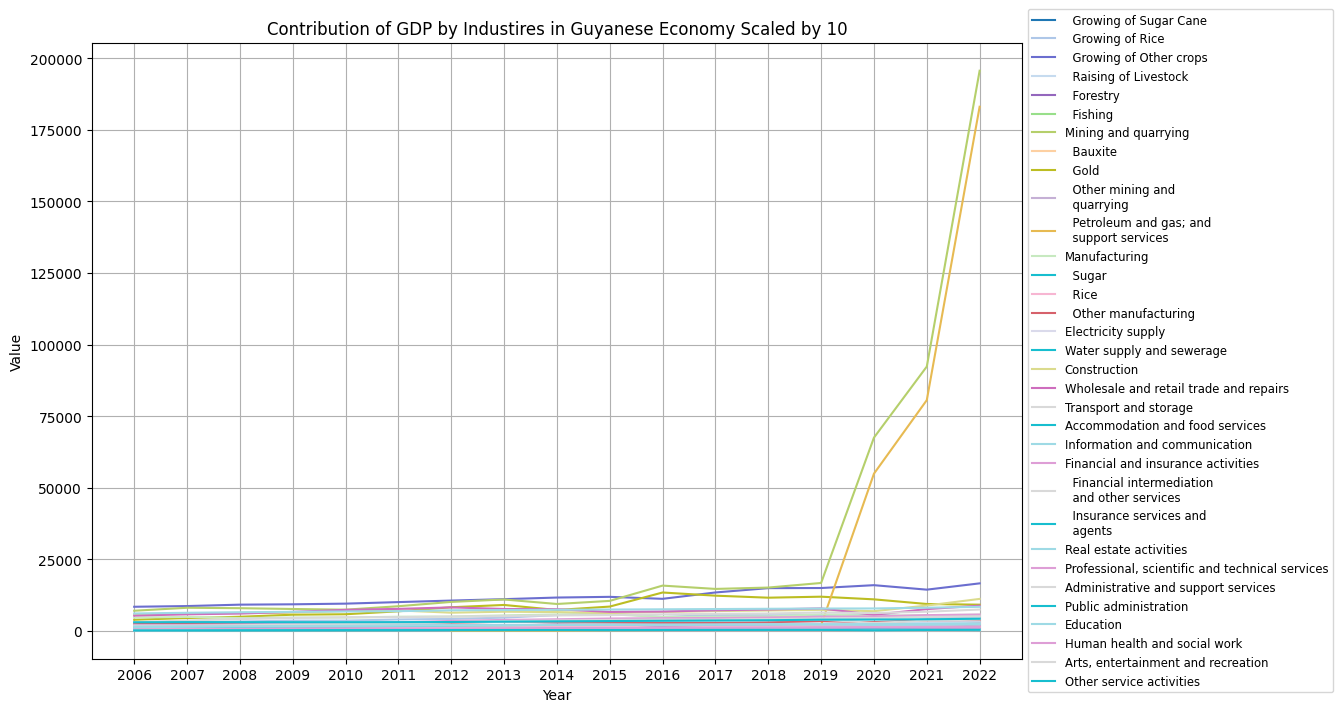

In [123]:
plt.figure(figsize=(12, 8))

colormaps = ['tab10', 'tab20', 'tab20b', 'tab20c']

# Loop through each column (except 'Year') and plot it against 'Year' with a different color
for i, column in enumerate(clean_gdf.columns[:-1]):  # Exclude the 'Year' column
    # Get a color from the current colormap
    color = plt.cm.get_cmap(colormaps[i % len(colormaps)])(i % len(clean_gdf.columns[:-1]))
    plt.plot(clean_gdf['Year'], clean_gdf[column]/10, label=column, color=color)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Contribution of GDP by Industires in Guyanese Economy Scaled by 10')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Show grid
plt.grid(True)

# Show the plot
plt.show()



##It can be identified that the top 3 industries within Guyana are Mining and quarrying,Petrolum and Growing of Other Crops

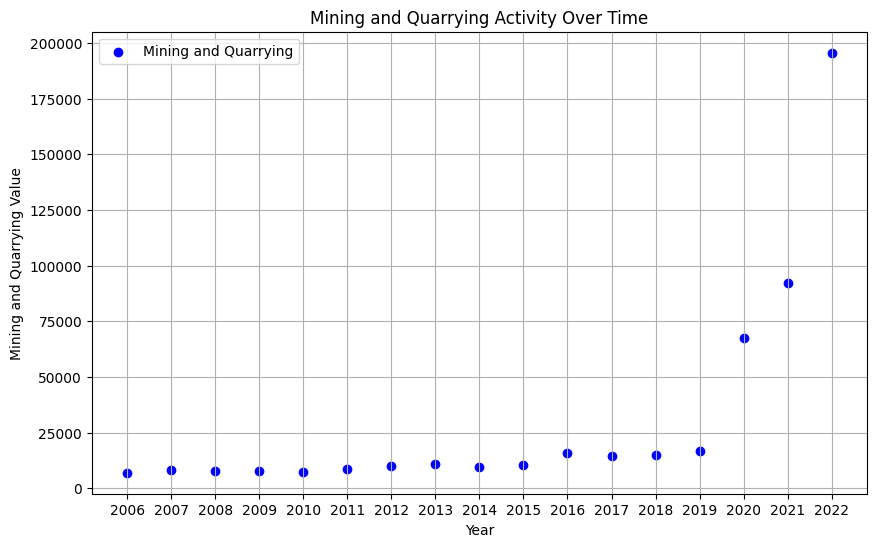

In [125]:

plt.figure(figsize=(10, 6))

# Plot scatter plot for 'Mining and quarrying' column
plt.scatter(clean_gdf['Year'], clean_gdf['Mining and quarrying']/10, label='Mining and Quarrying', color='blue', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mining and Quarrying Value')
plt.title('Mining and Quarrying Activity Over Time Scaled by 10')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()


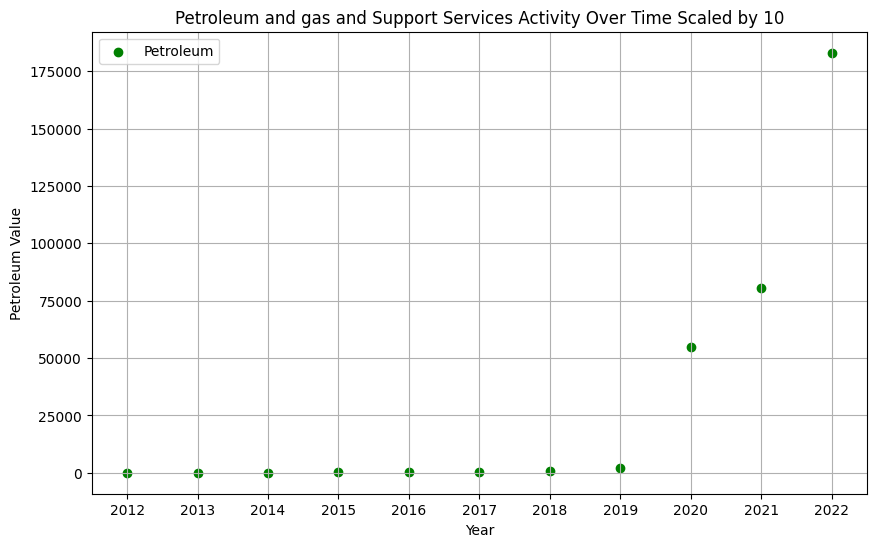

In [139]:
plt.figure(figsize=(10, 6))

# Plot scatter plot for 'Petroleum' column
plt.scatter(clean_gdf['Year'], clean_gdf['  Petroleum and gas; and\n  support services']/10, label='Petroleum', color='green', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Petroleum Value')
plt.title('Petroleum and gas and Support Services Activity Over Time Scaled by 10')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()


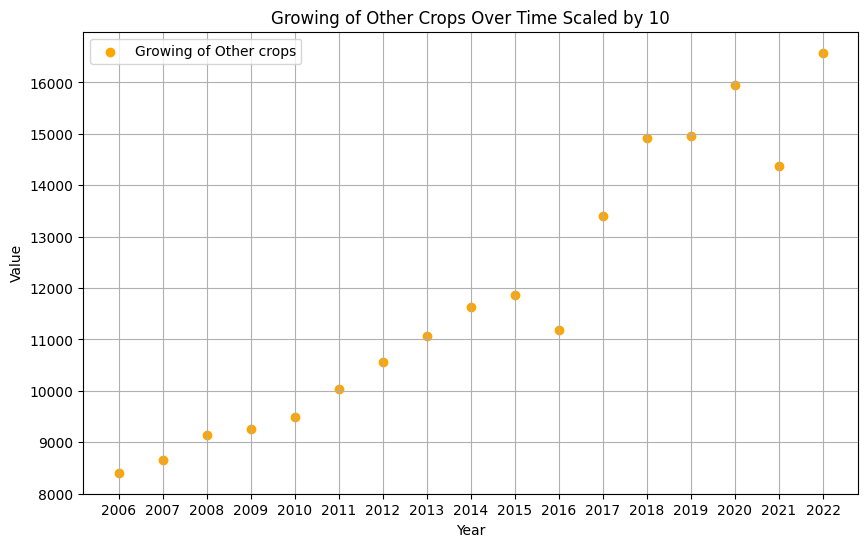

In [138]:
plt.figure(figsize=(10, 6))

# Plot scatter plot for 'Growing of Other crops' column
plt.scatter(clean_gdf['Year'], clean_gdf['  Growing of Other crops']/10, label='Growing of Other crops', color='orange', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Growing of Other Crops Over Time Scaled by 10')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()
